# Problem Statement

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 



## Understanding and Defining Churn

There are two main models of payment in the telecom industry - **postpaid** (customers pay a monthly/annual bill after using the services) and **prepaid** (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

 



## Definitions of Churn

There are various ways to define churn, such as:

**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, we will use the **usage-based definition** to define churn.



## High-value Churn


In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## Understanding the Business Objective and the Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The **business objective** is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **three phases**  of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. We **define churn based on this phase**. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

 



## Data Dictionary

The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.

 

The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

In [1]:
# Load libraries
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', -1)

In [2]:
data=pd.read_excel(r'../input/telecom-chum/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
data

Acronyms      \
0   MOBILE_NUMBER   
1   CIRCLE_ID       
2   LOC             
3   STD             
4   IC              
5   OG              
6   T2T             
7   T2M             
8   T2O             
9   T2F             
10  T2C             
11  ARPU            
12  MOU             
13  AON             
14  ONNET           
15  OFFNET          
16  ROAM            
17  SPL             
18  ISD             
19  RECH            
20  NUM             
21  AMT             
22  MAX             
23  DATA            
24  3G              
25  AV              
26  VOL             
27  2G              
28  PCK             
29  NIGHT           
30  MONTHLY         
31  SACHET          
32  *.6             
33  *.7             
34  *.8             
35  *.9             
36  FB_USER         
37  VBC             

                                                                          Descriptions  
0   Customer phone number                                                               
1   Telecom circle area to which the customer belongs to                                
2   Local calls - within same telecom circle                                            
3   STD calls - outside the calling circle                                              
4   Incoming calls                                                                      
5   Outgoing calls                                                                      
6   Operator T to T, i.e. within same operator (mobile to mobile)                       
7   Operator T to other operator mobile                                                 
8   Operator T to other operator fixed line                                             
9   Operator T to fixed lines of T                                                      
10  Operator T to it’s own call center                                                  
11  Average revenue per user                                                            
12  Minutes of usage - voice calls                                                      
13  Age on network - number of days the customer is using the operator T network        
14  All kind of calls within the same operator network                                  
15  All kind of calls outside the operator T network                                    
16  Indicates that customer is in roaming zone during the call                          
17  Special calls                                                                       
18  ISD calls                                                                           
19  Recharge                                                                            
20  Number                                                                              
21  Amount in local currency                                                            
22  Maximum                                                                             
23  Mobile internet                                                                     
24  3G network                                                                          
25  Average                                                                             
26  Mobile internet usage volume (in MB)                                                
27  2G network                                                                          
28  Prepaid service schemes called - PACKS                                              
29  Scheme to use during specific night hours only                                      
30  Service schemes with validity equivalent to a month                                 
31  Service schemes with validity smaller than a month                                  
32  KPI for the month of June                                                           
33  KPI for the month of July                                                           
34  KPI for the month of August                                       

# Data Preparation

The following data preparation steps are crucial for this problem:

 

**1. Derive new features**

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

 

**2. Filter high-value customers**

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the **70th percentile** of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 29.9k rows.

 

**3. Tag churners and remove attributes of the churn phase**

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9


After tagging churners, **remove all the attributes corresponding to the churn phase** (all attributes having ‘ _9’, etc. in their names).

 



# Modelling

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

 

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

 

You can take the following suggestive steps to build the model:

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. We can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

 

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a **logistic regression model** or a model from the **tree family**. In case of logistic regression, make sure to handle multi-collinearity.

 

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

 

Finally, **recommend strategies to manage customer churn** based on your observations.

 



# Load the data

In [3]:
telecom=pd.read_csv(r'../input/telecom-chum/telecom_churn_data.csv')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7001865778     109        0.0             0.0             0.0              
2  7001625959     109        0.0             0.0             0.0              
3  7001204172     109        0.0             0.0             0.0              
4  7000142493     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014            197.385  214.816  213.803  21.100  NaN            
1  9/30/2014            34.047   355.074  268.321  86.285   24.11         
2  9/30/2014            167.690  189.058  210.226  290.714  11.54         
3  9/30/2014            221.338  251.102  508.054  389.500  99.91         
4  9/30/2014            261.636  309.876  238.174  163.426  50.31         

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 NaN           0.00        NaN          NaN           NaN             
1  78.68        7.68         18.34        15.74         99.84          
2  55.24        37.26        74.81        143.33        220.59         
3  54.39        310.98       241.71       123.31        109.01         
4  149.44       83.89        58.78        76.96         91.88          

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.00         NaN           NaN            NaN             0.00            
1  304.76        53.76         0.0            0.00           0.00            
2  208.36        118.91        0.0            0.00           0.00            
3  71.68         113.54        0.0            54.86          44.38           
4  124.26        45.81         0.0            0.00           0.00            

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 NaN            NaN            NaN             0.00          NaN              
1  0.00           0.0            0.00           0.00           0.00            
2  38.49          0.0            0.00           0.00           70.94           
3  0.00           0.0            28.09          39.04          0.00            
4  0.00           0.0            0.00           0.00           0.00            

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  23.88             74.56             7.68              18.34              
2  7.19              28.74             13.58             14.39              
3  73.68             34.81             10.61             15.49              
4  50.31             149.44            83.89             58.78              

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  11.51             75.94             291.86            53.76              
2  29.34             16.86             38.46             28.16              
3  107.43            83.21             22.46             65.46              
4  67.64             91.88             124.26            37.89              

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  0.00              0.00              0.00              0.00               
2  24.11             21.79             15.61             22.24              
3  1.91              0.65              4.91        

In [4]:
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
telecom.shape

(99999, 226)

In [6]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  9.999900e+04   99999.0    98981.0         98981.0          
mean   7.001207e+09   109.0      0.0             0.0              
std    6.956694e+05   0.0        0.0             0.0              
min    7.000000e+09   109.0      0.0             0.0              
25%    7.000606e+09   109.0      0.0             0.0              
50%    7.001205e+09   109.0      0.0             0.0              
75%    7.001812e+09   109.0      0.0             0.0              
max    7.002411e+09   109.0      0.0             0.0              

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count  98981.0         99999.000000  99999.000000  99999.000000  99999.000000   
mean   0.0             282.987358    278.536648    279.154731    261.645069     
std    0.0             328.439770    338.156291    344.474791    341.998630     
min    0.0            -2258.709000  -2014.045000  -945.808000   -1899.505000    
25%    0.0             93.411500     86.980500     84.126000     62.685000      
50%    0.0             197.704000    191.640000    192.080000    176.849000     
75%    0.0             371.060000    365.344500    369.370500    353.466500     
max    0.0             27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean   132.395875    133.670805    133.018098    130.302327    197.935577     
std    297.207406    308.794148    308.951589    308.477668    316.851613     
min    0.000000      0.000000      0.000000      0.000000      0.000000       
25%    7.380000      6.660000      6.460000      5.330000      34.730000      
50%    34.310000     32.330000     32.360000     29.840000     96.310000      
75%    118.740000    115.595000    115.860000    112.130000    231.860000     
max    7376.710000   8157.780000   10752.560000  10427.460000  8362.360000    

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000   96140.000000    
mean   197.045133    196.574803    190.337222    9.950013       7.149898        
std    325.862803    327.170662    319.396092    72.825411      73.447948       
min    0.000000      0.000000      0.000000      0.000000       0.000000        
25%    32.190000     31.630000     27.130000     0.000000       0.000000        
50%    91.735000     92.140000     87.290000     0.000000       0.000000        
75%    226.815000    228.260000    220.505000    0.000000       0.000000        
max    9667.130000   14007.340000  10310.760000  13724.380000   15371.040000    

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count  94621.000000   92254.000000   96062.000000   96140.000000    
mean   7.292981       6.343841       13.911337      9.818732        
std    68.402466      57.137537      71.443196      58.455762       
min    0.000000       0.000000       0.000000       0.000000        
25%    0.000000       0.000000       0.000000       0.000000        
50%    0.000000       0.000000       0.000000       0.000000        
75%    0.000000       0.000000       0.000000       0.000000        
max    13095.360000   8464.030000    3775.110000    2812.040000     

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count  94621.000000   92254.000000   96062.000000      96140.000000       
mean   9.971890       8.555519       47.100763         46.473010          
std    64.713221      58.438186      150.856393        155.318705         
min    0.000000       0.000000       0.000000          0.000000           
25%    0.000000       0.000000       1.660000          1.630000           
50%    0.000000       0.000000       11.910000         11.610000          
75%    0.000000       0.000000       40.960000         39.910000          
max    53

## Churn definition

In [7]:
telecom['total_data_rech_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7001865778     109        0.0             0.0             0.0              
2  7001625959     109        0.0             0.0             0.0              
3  7001204172     109        0.0             0.0             0.0              
4  7000142493     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014            197.385  214.816  213.803  21.100  NaN            
1  9/30/2014            34.047   355.074  268.321  86.285   24.11         
2  9/30/2014            167.690  189.058  210.226  290.714  11.54         
3  9/30/2014            221.338  251.102  508.054  389.500  99.91         
4  9/30/2014            261.636  309.876  238.174  163.426  50.31         

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 NaN           0.00        NaN          NaN           NaN             
1  78.68        7.68         18.34        15.74         99.84          
2  55.24        37.26        74.81        143.33        220.59         
3  54.39        310.98       241.71       123.31        109.01         
4  149.44       83.89        58.78        76.96         91.88          

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.00         NaN           NaN            NaN             0.00            
1  304.76        53.76         0.0            0.00           0.00            
2  208.36        118.91        0.0            0.00           0.00            
3  71.68         113.54        0.0            54.86          44.38           
4  124.26        45.81         0.0            0.00           0.00            

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 NaN            NaN            NaN             0.00          NaN              
1  0.00           0.0            0.00           0.00           0.00            
2  38.49          0.0            0.00           0.00           70.94           
3  0.00           0.0            28.09          39.04          0.00            
4  0.00           0.0            0.00           0.00           0.00            

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  23.88             74.56             7.68              18.34              
2  7.19              28.74             13.58             14.39              
3  73.68             34.81             10.61             15.49              
4  50.31             149.44            83.89             58.78              

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  11.51             75.94             291.86            53.76              
2  29.34             16.86             38.46             28.16              
3  107.43            83.21             22.46             65.46              
4  67.64             91.88             124.26            37.89              

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  0.00              0.00              0.00              0.00               
2  24.11             21.79             15.61             22.24              
3  1.91              0.65              4.91        

In [8]:
telecom['amt_data_6'] = telecom[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
telecom['amt_data_7'] = telecom[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)
telecom['AVG_amt_data_6_7'] = telecom[['amt_data_6','amt_data_7']].mean(axis=1)
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7001865778     109        0.0             0.0             0.0              
2  7001625959     109        0.0             0.0             0.0              
3  7001204172     109        0.0             0.0             0.0              
4  7000142493     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014            197.385  214.816  213.803  21.100  NaN            
1  9/30/2014            34.047   355.074  268.321  86.285   24.11         
2  9/30/2014            167.690  189.058  210.226  290.714  11.54         
3  9/30/2014            221.338  251.102  508.054  389.500  99.91         
4  9/30/2014            261.636  309.876  238.174  163.426  50.31         

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 NaN           0.00        NaN          NaN           NaN             
1  78.68        7.68         18.34        15.74         99.84          
2  55.24        37.26        74.81        143.33        220.59         
3  54.39        310.98       241.71       123.31        109.01         
4  149.44       83.89        58.78        76.96         91.88          

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.00         NaN           NaN            NaN             0.00            
1  304.76        53.76         0.0            0.00           0.00            
2  208.36        118.91        0.0            0.00           0.00            
3  71.68         113.54        0.0            54.86          44.38           
4  124.26        45.81         0.0            0.00           0.00            

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 NaN            NaN            NaN             0.00          NaN              
1  0.00           0.0            0.00           0.00           0.00            
2  38.49          0.0            0.00           0.00           70.94           
3  0.00           0.0            28.09          39.04          0.00            
4  0.00           0.0            0.00           0.00           0.00            

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  23.88             74.56             7.68              18.34              
2  7.19              28.74             13.58             14.39              
3  73.68             34.81             10.61             15.49              
4  50.31             149.44            83.89             58.78              

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  11.51             75.94             291.86            53.76              
2  29.34             16.86             38.46             28.16              
3  107.43            83.21             22.46             65.46              
4  67.64             91.88             124.26            37.89              

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  0.00              0.00              0.00              0.00               
2  24.11             21.79             15.61             22.24              
3  1.91              0.65              4.91        

In [9]:
telecom[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(.05, 1, 19, 0))

total_rech_amt_6  total_rech_amt_7  AVG_amt_data_6_7
0.05  0.0               0.0               32.5            
0.10  0.0               0.0               60.0            
0.15  46.0              36.0              85.0            
0.20  80.0              65.0              108.5           
0.25  109.0             100.0             128.0           
0.30  120.0             110.0             155.0           
0.35  146.0             140.0             180.0           
0.40  170.0             160.0             209.5           
0.45  200.0             196.0             241.0           
0.50  230.0             220.0             275.0           
0.55  254.0             250.0             314.5           
0.60  290.0             283.0             360.0           
0.65  330.0             326.0             411.5           
0.70  378.0             370.0             478.0           
0.75  437.5             428.0             553.0           
0.80  504.0             500.0             656.5           
0.85  594.0             590.0             800.0           
0.90  732.0             731.0             1028.0          
0.95  994.0             993.0             1512.0

As per the definition of high value customers are those whose recharge amount should be more than or equal to 70th percentile.

But if we use greater than or equal to, we end up getting a little above 30K records as against to 29.9K records.
So, if we consider only greater than, then we get 29.9K records.
Therefore we have considered greater than to filter high value customers

In [10]:
highvalue = telecom[(telecom['AVG_amt_data_6_7']> telecom['AVG_amt_data_6_7'].quantile(0.7))]
highvalue.head()


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   7000842753     109        0.0             0.0             0.0              
7   7000701601     109        0.0             0.0             0.0              
8   7001524846     109        0.0             0.0             0.0              
21  7002124215     109        0.0             0.0             0.0              
23  7000887461     109        0.0             0.0             0.0              

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0   6/30/2014            7/31/2014            8/31/2014             
7   6/30/2014            7/31/2014            8/31/2014             
8   6/30/2014            7/31/2014            8/31/2014             
21  6/30/2014            7/31/2014            8/31/2014             
23  6/30/2014            7/31/2014            8/31/2014             

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0   9/30/2014            197.385   214.816   213.803   21.100  NaN            
7   9/30/2014            1069.180  1349.850  3171.480  500.000  57.84         
8   9/30/2014            378.721   492.223   137.362   166.787  413.69        
21  9/30/2014            514.453   597.753   637.760   578.596  102.41        
23  9/30/2014            74.350    193.897   366.966   811.480  48.96         

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0  NaN           0.00        NaN          NaN           NaN             
7   54.68        52.29       NaN           453.43        567.16         
8   351.03       35.08        33.46        94.66         80.63          
21  132.11       85.14        161.63       757.93        896.68         
23  50.66        33.58        15.74        85.41         89.36          

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0   0.00         NaN           NaN            NaN             0.00            
7   325.91       NaN            16.23          33.49          31.64           
8   136.48        108.71        0.00           0.00           0.00            
21  983.39        869.89        0.00           0.00           0.00            
23  205.89        111.88        0.00           0.00           0.00            

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0  NaN            NaN            NaN             0.00          NaN              
7  NaN             23.74          12.59          38.06         NaN              
8   0.0            0.00           0.00           0.00           0.0             
21  0.0            0.00           0.00           0.00           0.0             
23  0.0            0.00           0.00           0.00           0.0             

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0  NaN               NaN                0.00             NaN                 
7   51.39             31.38             40.28            NaN                 
8   297.13            217.59            12.49             26.13              
21  4.48              6.16              23.34             29.98              
23  48.96             50.66             33.58             15.74              

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0  NaN               NaN                0.00             NaN                 
7   308.63            447.38            162.28           NaN                 
8   80.96             70.58             50.54             34.58              
21  91.81             87.93             104.81            107.54             
23  82.94             83.01             148.56            83.73              

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0  NaN               NaN                0.00             NaN                 
7   62.13             55.14             53.23            NaN                 
8   0.00              0.00              0.00              0.

In [11]:
highvalue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 231 entries, mobile_number to AVG_amt_data_6_7
dtypes: float64(184), int64(35), object(12)
memory usage: 53.0+ MB


In [12]:
highvalue.shape

(29953, 231)

In [13]:
highvalue.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  2.995300e+04   29953.0    29730.0         29730.0          
mean   7.001206e+09   109.0      0.0             0.0              
std    6.908102e+05   0.0        0.0             0.0              
min    7.000000e+09   109.0      0.0             0.0              
25%    7.000609e+09   109.0      0.0             0.0              
50%    7.001203e+09   109.0      0.0             0.0              
75%    7.001804e+09   109.0      0.0             0.0              
max    7.002411e+09   109.0      0.0             0.0              

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count  29730.0         29953.000000  29953.000000  29953.000000  29953.000000   
mean   0.0             558.820058    561.160547    508.890301    467.446183     
std    0.0             460.868223    480.028497    502.136278    501.837624     
min    0.0            -2258.709000  -2014.045000  -945.808000   -1899.505000    
25%    0.0             310.142000    310.071000    231.615000    189.750000     
50%    0.0             482.354000    481.496000    427.604000    388.093000     
75%    0.0             700.240000    698.829000    661.753000    626.637000     
max    0.0             27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  29411.000000  29417.000000  28781.000000  28055.000000  29411.000000   
mean   265.708886    272.935850    243.888097    226.027951    380.688975     
std    462.692744    483.282132    465.505577    447.494695    484.441095     
min    0.000000      0.000000      0.000000      0.000000      0.000000       
25%    19.250000     18.180000     14.280000     11.440000     78.550000      
50%    88.140000     86.890000     72.990000     65.430000     229.630000     
75%    297.490000    298.380000    255.310000    230.260000    494.755000     
max    7376.710000   8157.780000   10752.560000  10427.460000  8362.360000    

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29417.000000  28781.000000  28055.000000  29411.000000   29417.000000    
mean   385.124799    348.769656    323.826598    16.421142      12.876567       
std    501.024091    486.836956    455.662109    77.012820      76.501945       
min    0.000000      0.000000      0.000000      0.000000       0.000000        
25%    76.180000     58.760000     49.625000     0.000000       0.000000        
50%    227.130000    197.690000    178.290000    0.000000       0.000000        
75%    500.480000    455.440000    419.965000    0.000000       0.000000        
max    9667.130000   14007.340000  10310.760000  2613.310000    3813.290000     

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count  28781.000000   28055.000000   29411.000000   29417.000000    
mean   13.021785      11.255702      27.086158      20.522376       
std    75.630647      69.181558      117.284108     96.967183       
min    0.000000       0.000000       0.000000       0.000000        
25%    0.000000       0.000000       0.000000       0.000000        
50%    0.000000       0.000000       0.000000       0.000000        
75%    0.000000       0.000000       0.000000       0.000000        
max    4169.810000    3220.660000    3775.110000    2812.040000     

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count  28781.000000   28055.000000   29411.000000      29417.000000       
mean   20.699213      16.876168      86.132694         87.325499          
std    106.833757     91.421303      230.772468        242.604091         
min    0.000000       0.000000       0.000000          0.000000           
25%    0.000000       0.000000       5.030000          5.290000           
50%    0.000000       0.000000       25.590000         25.790000          
75%    0.000000       0.000000       79.870000         80.440000          
max    53

## Churn Customers

Identifying churn high value customers based on the last month i.e. month 9



In [14]:
highvalue['churn_flag'] = np.where(
    ((highvalue['total_ic_mou_9'] == 0.00) | (highvalue['total_og_mou_9'] == 0.00))
    & ((highvalue['vol_2g_mb_9'] == 0.00) | (highvalue['vol_3g_mb_9'] == 0.00)),
    1, 0 )
highvalue.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   7000842753     109        0.0             0.0             0.0              
7   7000701601     109        0.0             0.0             0.0              
8   7001524846     109        0.0             0.0             0.0              
21  7002124215     109        0.0             0.0             0.0              
23  7000887461     109        0.0             0.0             0.0              

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0   6/30/2014            7/31/2014            8/31/2014             
7   6/30/2014            7/31/2014            8/31/2014             
8   6/30/2014            7/31/2014            8/31/2014             
21  6/30/2014            7/31/2014            8/31/2014             
23  6/30/2014            7/31/2014            8/31/2014             

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0   9/30/2014            197.385   214.816   213.803   21.100  NaN            
7   9/30/2014            1069.180  1349.850  3171.480  500.000  57.84         
8   9/30/2014            378.721   492.223   137.362   166.787  413.69        
21  9/30/2014            514.453   597.753   637.760   578.596  102.41        
23  9/30/2014            74.350    193.897   366.966   811.480  48.96         

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0  NaN           0.00        NaN          NaN           NaN             
7   54.68        52.29       NaN           453.43        567.16         
8   351.03       35.08        33.46        94.66         80.63          
21  132.11       85.14        161.63       757.93        896.68         
23  50.66        33.58        15.74        85.41         89.36          

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0   0.00         NaN           NaN            NaN             0.00            
7   325.91       NaN            16.23          33.49          31.64           
8   136.48        108.71        0.00           0.00           0.00            
21  983.39        869.89        0.00           0.00           0.00            
23  205.89        111.88        0.00           0.00           0.00            

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0  NaN            NaN            NaN             0.00          NaN              
7  NaN             23.74          12.59          38.06         NaN              
8   0.0            0.00           0.00           0.00           0.0             
21  0.0            0.00           0.00           0.00           0.0             
23  0.0            0.00           0.00           0.00           0.0             

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0  NaN               NaN                0.00             NaN                 
7   51.39             31.38             40.28            NaN                 
8   297.13            217.59            12.49             26.13              
21  4.48              6.16              23.34             29.98              
23  48.96             50.66             33.58             15.74              

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0  NaN               NaN                0.00             NaN                 
7   308.63            447.38            162.28           NaN                 
8   80.96             70.58             50.54             34.58              
21  91.81             87.93             104.81            107.54             
23  82.94             83.01             148.56            83.73              

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0  NaN               NaN                0.00             NaN                 
7   62.13             55.14             53.23            NaN                 
8   0.00              0.00              0.00              0.

In [15]:
highvalue['churn_flag'].value_counts()

0    26698
1    3255 
Name: churn_flag, dtype: int64

In [16]:
highvalue['churn_flag'].value_counts()* 100/highvalue.shape[0]

0    89.132975
1    10.867025
Name: churn_flag, dtype: float64

Let's drop all features related to churn phase i.e. 9th month

In [17]:
highvalue.shape

(29953, 232)

In [18]:
highvalue = highvalue.drop(highvalue.filter(regex='_9|sep', axis = 1).columns, axis=1)
highvalue.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   7000842753     109        0.0             0.0             0.0              
7   7000701601     109        0.0             0.0             0.0              
8   7001524846     109        0.0             0.0             0.0              
21  7002124215     109        0.0             0.0             0.0              
23  7000887461     109        0.0             0.0             0.0              

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0   6/30/2014            7/31/2014            8/31/2014            197.385    
7   6/30/2014            7/31/2014            8/31/2014            1069.180   
8   6/30/2014            7/31/2014            8/31/2014            378.721    
21  6/30/2014            7/31/2014            8/31/2014            514.453    
23  6/30/2014            7/31/2014            8/31/2014            74.350     

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.816   213.803  NaN          NaN           0.00        NaN             
7   1349.850  3171.480  57.84        54.68        52.29        453.43         
8   492.223   137.362   413.69       351.03       35.08        94.66          
21  597.753   637.760   102.41       132.11       85.14        757.93         
23  193.897   366.966   48.96        50.66        33.58        85.41          

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  NaN            0.00         NaN            NaN             0.00            
7   567.16        325.91        16.23          33.49          31.64           
8   80.63         136.48        0.00           0.00           0.00            
21  896.68        983.39        0.00           0.00           0.00            
23  89.36         205.89        0.00           0.00           0.00            

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0  NaN            NaN             0.00          NaN                 
7   23.74          12.59          38.06          51.39              
8   0.00           0.00           0.00           297.13             
21  0.00           0.00           0.00           4.48               
23  0.00           0.00           0.00           48.96              

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0  NaN                0.00             NaN               NaN                 
7   31.38             40.28             308.63            447.38             
8   217.59            12.49             80.96             70.58              
21  6.16              23.34             91.81             87.93              
23  50.66             33.58             82.94             83.01              

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0   0.00             NaN               NaN                0.00               
7   162.28            62.13             55.14             53.23              
8   50.54             0.00              0.00              0.00               
21  104.81            0.75              0.00              1.58               
23  148.56            0.00              0.00              0.00               

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0  NaN               NaN                0.00             NaN             
7   0.0               0.0               0.00              422.16         
8   0.0               0.0               7.15              378.09         
21  0.0               0.0               0.00              97.04          
23  0.0               0.0               17.71             131.91         

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0  NaN            0.00         NaN               NaN                 
7   533.91        255.79        4.30              23.29              
8   288.18        63.04         116.56            133.43             
21  94.09         12

In [19]:
highvalue.shape

(29953, 177)

In [20]:
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 177 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             29953 non-null  int64  
 1   circle_id                 29953 non-null  int64  
 2   loc_og_t2o_mou            29730 non-null  float64
 3   std_og_t2o_mou            29730 non-null  float64
 4   loc_ic_t2o_mou            29730 non-null  float64
 5   last_date_of_month_6      29953 non-null  object 
 6   last_date_of_month_7      29926 non-null  object 
 7   last_date_of_month_8      29788 non-null  object 
 8   arpu_6                    29953 non-null  float64
 9   arpu_7                    29953 non-null  float64
 10  arpu_8                    29953 non-null  float64
 11  onnet_mou_6               29411 non-null  float64
 12  onnet_mou_7               29417 non-null  float64
 13  onnet_mou_8               28781 non-null  float64
 14  offne

Let's check if we have missing values in the dataset?

In [21]:
highvalue.isna().sum().sort_values(ascending=False)

night_pck_user_8            14018
fb_user_8                   14018
count_rech_2g_8             14018
count_rech_3g_8             14018
av_rech_amt_data_8          14018
total_rech_data_8           14018
date_of_last_rech_data_8    14018
arpu_3g_8                   14018
arpu_2g_8                   14018
max_rech_data_8             14018
arpu_2g_6                   13213
total_rech_data_6           13213
fb_user_6                   13213
count_rech_2g_6             13213
night_pck_user_6            13213
count_rech_3g_6             13213
arpu_3g_6                   13213
av_rech_amt_data_6          13213
max_rech_data_6             13213
date_of_last_rech_data_6    13213
total_data_rech_6           13213
date_of_last_rech_data_7    12915
total_data_rech_7           12915
total_rech_data_7           12915
fb_user_7                   12915
av_rech_amt_data_7          12915
count_rech_3g_7             12915
count_rech_2g_7             12915
arpu_3g_7                   12915
max_rech_data_

In [22]:
round((highvalue.isna().sum()*100/highvalue.shape[0]),2).sort_values(ascending=False)

night_pck_user_8            46.80
fb_user_8                   46.80
count_rech_2g_8             46.80
count_rech_3g_8             46.80
av_rech_amt_data_8          46.80
total_rech_data_8           46.80
date_of_last_rech_data_8    46.80
arpu_3g_8                   46.80
arpu_2g_8                   46.80
max_rech_data_8             46.80
arpu_2g_6                   44.11
total_rech_data_6           44.11
fb_user_6                   44.11
count_rech_2g_6             44.11
night_pck_user_6            44.11
count_rech_3g_6             44.11
arpu_3g_6                   44.11
av_rech_amt_data_6          44.11
max_rech_data_6             44.11
date_of_last_rech_data_6    44.11
total_data_rech_6           44.11
date_of_last_rech_data_7    43.12
total_data_rech_7           43.12
total_rech_data_7           43.12
fb_user_7                   43.12
av_rech_amt_data_7          43.12
count_rech_3g_7             43.12
count_rech_2g_7             43.12
arpu_3g_7                   43.12
max_rech_data_

In [23]:
unique_stats = pd.DataFrame(highvalue.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_stats[unique_stats['nunique'] == 1])



                 feature  nunique
1   circle_id             1      
2   loc_og_t2o_mou        1      
3   std_og_t2o_mou        1      
4   loc_ic_t2o_mou        1      
5   last_date_of_month_6  1      
6   last_date_of_month_7  1      
7   last_date_of_month_8  1      
47  std_og_t2c_mou_6      1      
48  std_og_t2c_mou_7      1      
49  std_og_t2c_mou_8      1      
86  std_ic_t2o_mou_6      1      
87  std_ic_t2o_mou_7      1      
88  std_ic_t2o_mou_8      1      


In [24]:
print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['nunique'] == 1]))

13 features with a single unique value.



In [25]:
highvalue.shape

(29953, 177)

In [26]:
highvalue = highvalue.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature']))
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753     197.385   214.816   213.803  NaN          NaN            
7   7000701601     1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846     378.721   492.223   137.362   413.69       351.03        
21  7002124215     514.453   597.753   637.760   102.41       132.11        
23  7000887461     74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00        NaN           NaN            0.00         NaN              
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0  NaN             0.00          NaN            NaN             0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0  NaN               NaN                0.00             NaN                 
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0  NaN                0.00             NaN               NaN                 
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00             NaN               NaN                0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0  NaN           NaN            0.00         NaN                 
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0  NaN                0.00             NaN               NaN                 
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00             NaN               NaN                0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99  

In [27]:
highvalue.shape

(29953, 164)

## Missing value treatment

In [28]:
round((highvalue.isna().sum()*100/highvalue.shape[0]),2).sort_values(ascending=False)

date_of_last_rech_data_8    46.80
total_rech_data_8           46.80
night_pck_user_8            46.80
arpu_2g_8                   46.80
arpu_3g_8                   46.80
fb_user_8                   46.80
count_rech_2g_8             46.80
max_rech_data_8             46.80
av_rech_amt_data_8          46.80
count_rech_3g_8             46.80
max_rech_data_6             44.11
date_of_last_rech_data_6    44.11
count_rech_2g_6             44.11
arpu_2g_6                   44.11
av_rech_amt_data_6          44.11
night_pck_user_6            44.11
total_rech_data_6           44.11
arpu_3g_6                   44.11
count_rech_3g_6             44.11
total_data_rech_6           44.11
fb_user_6                   44.11
arpu_3g_7                   43.12
arpu_2g_7                   43.12
count_rech_3g_7             43.12
av_rech_amt_data_7          43.12
total_data_rech_7           43.12
max_rech_data_7             43.12
total_rech_data_7           43.12
fb_user_7                   43.12
count_rech_2g_

### arpu_3g_8

Let's start with one of the highest missing feature arpu_3g_8

In [29]:
highvalue['arpu_3g_8'].isna().sum()

14018

In [30]:
round(highvalue['arpu_3g_8'].isna().sum()*100/highvalue.shape[0],2)

46.8

In [31]:
highvalue['arpu_3g_8'].describe()

count    15935.000000
mean     118.106064  
std      218.976760  
min     -24.490000   
25%      0.000000    
50%      10.020000   
75%      179.630000  
max      3716.900000 
Name: arpu_3g_8, dtype: float64

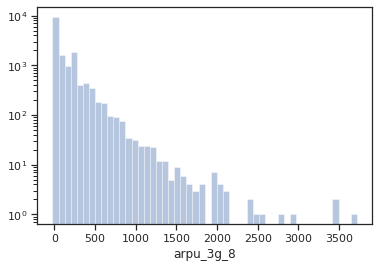

In [32]:
ax=sns.distplot(highvalue['arpu_3g_8'],kde=False)
ax.set_yscale('log')
plt.show()

We can observe that the range is huge.
We can't go with either mean or median as they can skew/distort the whole scenario.
Let's check data related variables of 8th month to decide on filling up the missing values   

In [33]:
highvalue[highvalue['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                                          'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                                          'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                                          'fb_user_8']].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

In [34]:
highvalue[highvalue['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                                          'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                                          'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                                          'fb_user_8']].head()

date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  \
7   NaN                     NaN                NaN                
21  NaN                     NaN                NaN                
38  NaN                     NaN                NaN                
41  NaN                     NaN                NaN                
48  NaN                     NaN                NaN                

    count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  \
7  NaN              NaN              NaN                  0.0           
21 NaN              NaN              NaN                  0.0           
38 NaN              NaN              NaN                  0.0           
41 NaN              NaN              NaN                  0.0           
48 NaN              NaN              NaN                  0.0           

    vol_3g_mb_8  arpu_2g_8  night_pck_user_8  monthly_2g_8  sachet_2g_8  \
7   0.0         NaN        NaN                0             0             
21  0.0         NaN        NaN                0             0             
38  0.0         NaN        NaN                0             0             
41  0.0         NaN        NaN                0             0             
48  0.0         NaN        NaN                0             0             

    monthly_3g_8  sachet_3g_8  fb_user_8  
7   0             0           NaN         
21  0             0           NaN         
38  0             0           NaN         
41  0             0           NaN         
48  0             0           NaN

We can infer that the customers hasn't bought the data at all in 8th month.

Let's fill the gap as 0

In [35]:
highvalue['arpu_3g_8'].fillna(0,inplace=True)
highvalue['arpu_3g_8'].isna().sum()

0

It's clearly evident from the above table that most of the missing values are from mobile data related only. We can follow the same approach and fill the gap.

In [36]:
round((highvalue.isna().sum()*100/highvalue.shape[0]),2).sort_values(ascending=False)

night_pck_user_8            46.80
fb_user_8                   46.80
count_rech_2g_8             46.80
count_rech_3g_8             46.80
av_rech_amt_data_8          46.80
total_rech_data_8           46.80
date_of_last_rech_data_8    46.80
arpu_2g_8                   46.80
max_rech_data_8             46.80
arpu_3g_6                   44.11
fb_user_6                   44.11
count_rech_2g_6             44.11
date_of_last_rech_data_6    44.11
arpu_2g_6                   44.11
count_rech_3g_6             44.11
total_rech_data_6           44.11
night_pck_user_6            44.11
av_rech_amt_data_6          44.11
max_rech_data_6             44.11
total_data_rech_6           44.11
total_rech_data_7           43.12
arpu_3g_7                   43.12
night_pck_user_7            43.12
max_rech_data_7             43.12
arpu_2g_7                   43.12
date_of_last_rech_data_7    43.12
av_rech_amt_data_7          43.12
count_rech_3g_7             43.12
count_rech_2g_7             43.12
fb_user_7     

Let's check the other missing feature 'isd_og_mou_8'

In [37]:
highvalue['isd_og_mou_8'].isna().sum()

1172

In [38]:
round((highvalue['isd_og_mou_8'].isna().sum()*100/highvalue.shape[0]),2)

3.91

We can clearly evident the range varies from 0.0 to 5681.54

It looks like the presence of outliers

Let's check the all outgoing related features of 8th month

In [39]:
highvalue[highvalue['isd_og_mou_8'].isna()][['loc_og_mou_8', 'std_og_mou_8', 
                                             'spl_og_mou_8', 'og_others_8', 
                                             'total_og_mou_8']].nunique()

loc_og_mou_8      0
std_og_mou_8      0
spl_og_mou_8      0
og_others_8       0
total_og_mou_8    1
dtype: int64

In [40]:
highvalue[highvalue['isd_og_mou_8'].isna()][['loc_og_mou_8', 'std_og_mou_8', 
                                             'spl_og_mou_8', 'og_others_8', 
                                             'total_og_mou_8']].head()

loc_og_mou_8  std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8
111 NaN           NaN           NaN           NaN           0.0           
188 NaN           NaN           NaN           NaN           0.0           
358 NaN           NaN           NaN           NaN           0.0           
527 NaN           NaN           NaN           NaN           0.0           
539 NaN           NaN           NaN           NaN           0.0

From the above we can impute the missing values of isd_og_mou_8 with 0



We have carried out the study for the rest of features as well and concluded that the missing values can be imputed with 0 values.

In [41]:
highvalue.fillna(0,inplace=True)

In [42]:
highvalue.isna().values.any()

False

# Duplicate Check

In [43]:
highvalueo=highvalue.copy()
highvalueo.drop_duplicates(subset=None, inplace=True)
highvalueo.shape

(29953, 164)

In [44]:
del highvalueo
highvalue.shape

(29953, 164)

No Duplicates Found

# Exploratory Analysis

The goal of EDA is to determine what our data can tell us!!! In this section, we make plots and find patterns, relationships etc.

churn_flag

In [45]:
round((highvalue['churn_flag'].value_counts()*100 / highvalue.shape[0]),2)

0    89.13
1    10.87
Name: churn_flag, dtype: float64

The flags 0 & 1 are Non-churn and churn respectively.

We can clearly see that the churn customers are 10.87% only.

So, we can infer that the dataset is an imbalanced dataset.

#### Fact 
Imbalance means that the number of data points available for the classes is different. Let's say if there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 55% points for one class and 45% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 80%-90% points for one class and 20%-10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

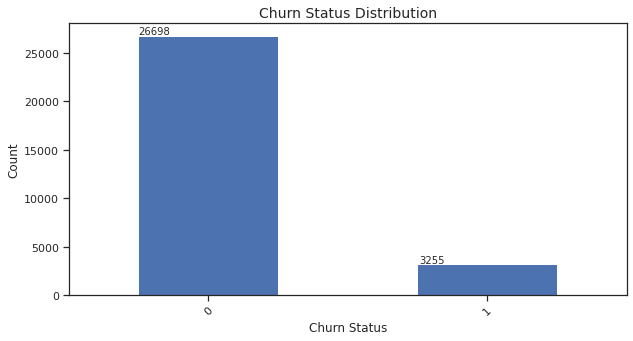

In [46]:
plt.figure(figsize=(10,5))
ax=highvalue['churn_flag'].value_counts().plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.title('Churn Status Distribution',fontsize=14)
plt.show()

# mobile_number

In [47]:
highvalue['mobile_number'].value_counts().sort_values(ascending = False).head()

7000883200    1
7000066065    1
7000688705    1
7001669696    1
7001405503    1
Name: mobile_number, dtype: int64

We can infer that the mobile_number is an unique column, means it's not repeated multiple times. So we can safely ignore as it's not going to add any value for our analysis

# arpu 
(Average Revenue per user)

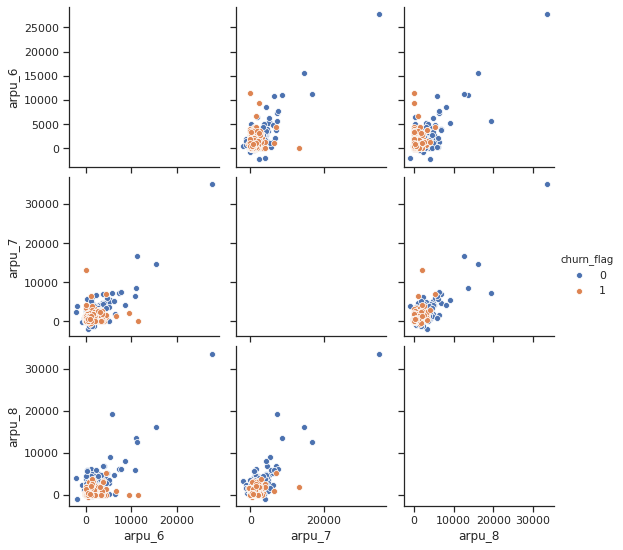

In [48]:
sns.pairplot(data=highvalue[['arpu_6','arpu_7','arpu_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

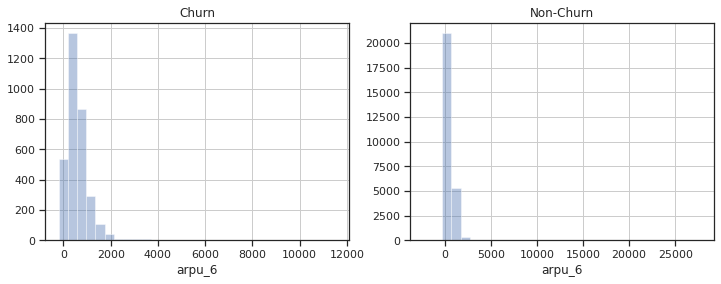

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

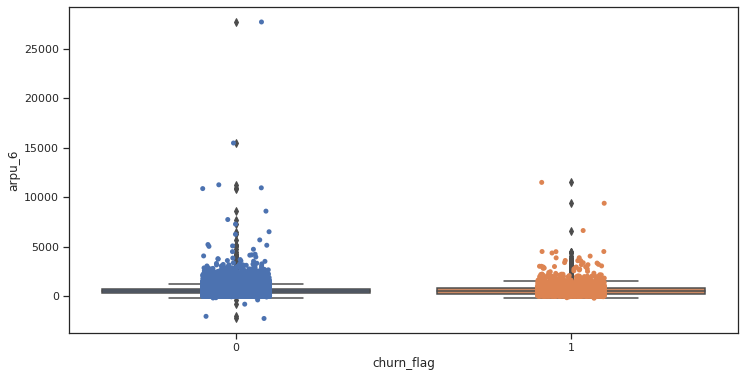

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,6))
sns.boxplot(x='churn_flag', y='arpu_6', data=highvalue)
sns.stripplot(x='churn_flag', y='arpu_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# onnet_mou 
(On network/ within the same network usage)

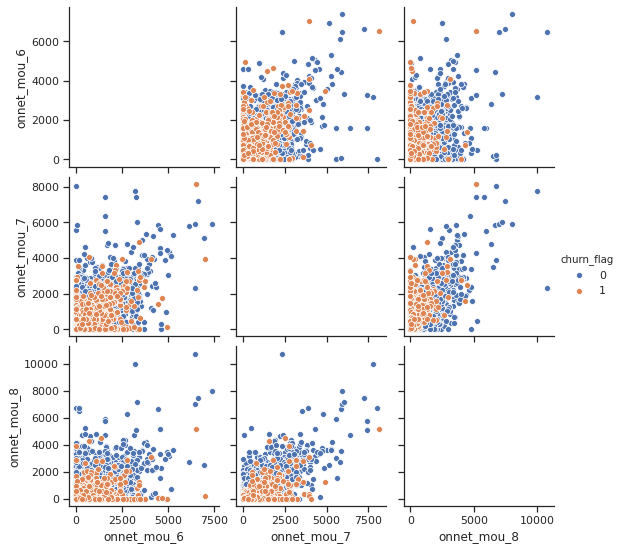

In [51]:
sns.pairplot(data=highvalue[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

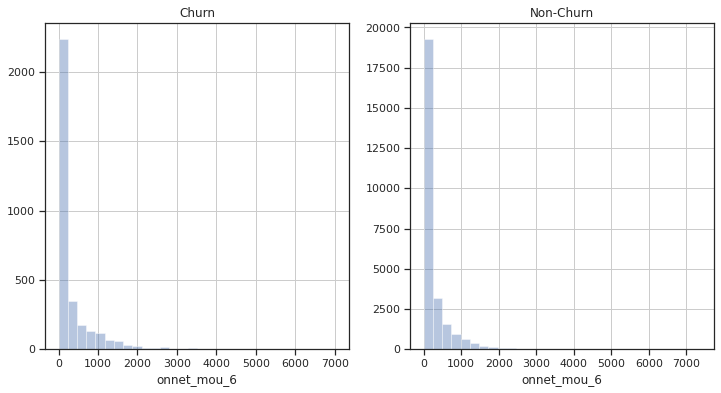

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].onnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].onnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

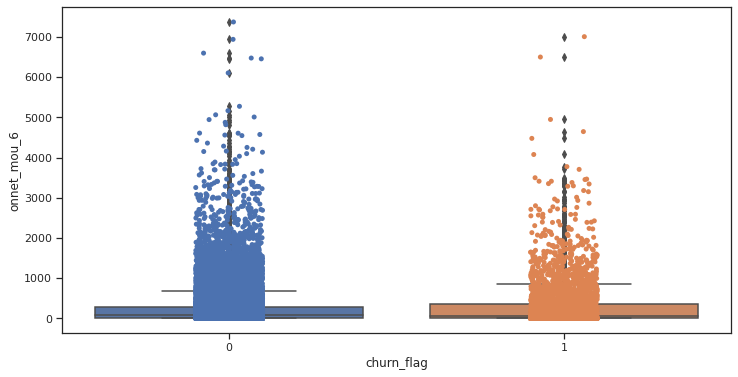

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='onnet_mou_6', data=highvalue)
sns.stripplot(x='churn_flag', y='onnet_mou_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# Offnet_mou 
(Calls outside of the operator network)

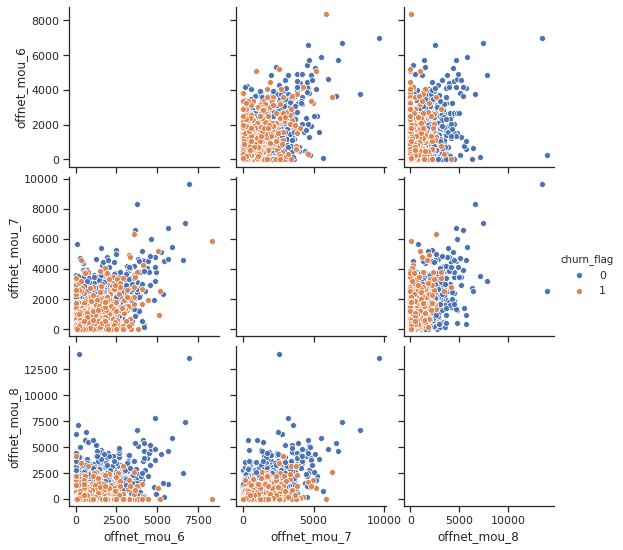

In [54]:
sns.pairplot(data=highvalue[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

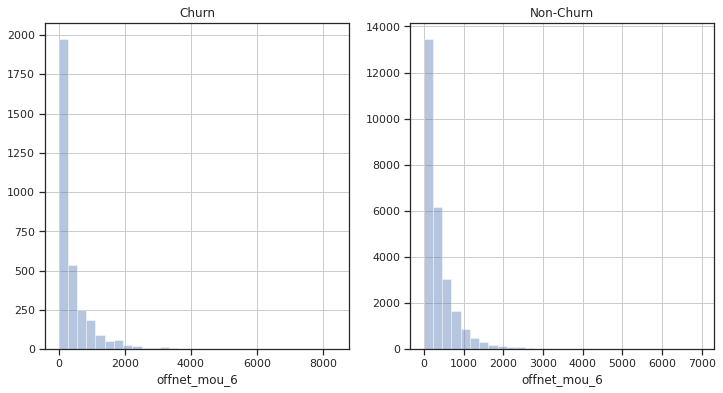

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].offnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].offnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

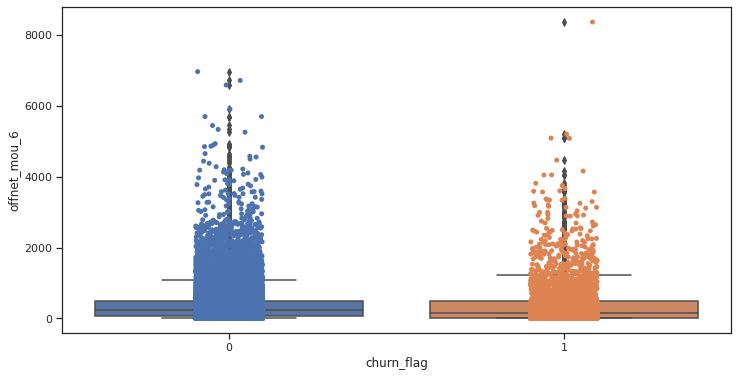

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='offnet_mou_6', data=highvalue)
sns.stripplot(x='churn_flag', y='offnet_mou_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# roam_ic_mou
(Customer in roaming zone)

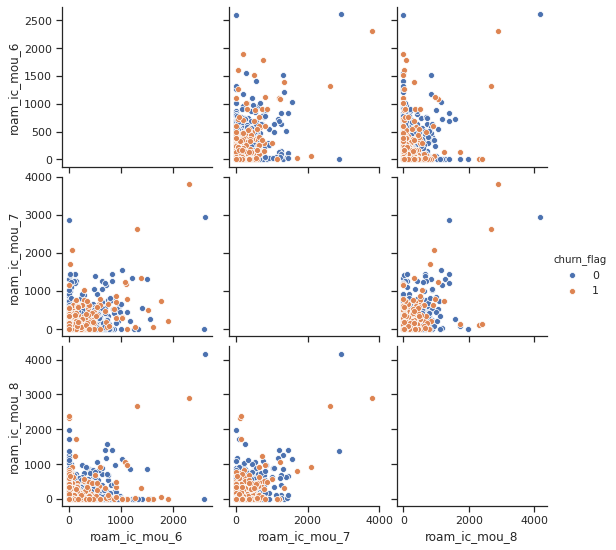

In [57]:
sns.pairplot(data=highvalue[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

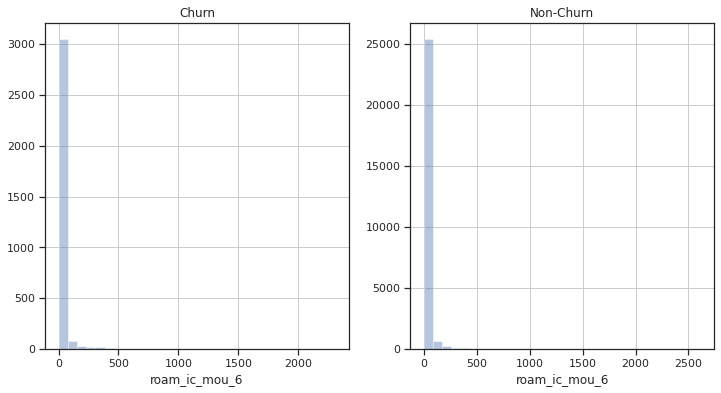

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].roam_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].roam_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

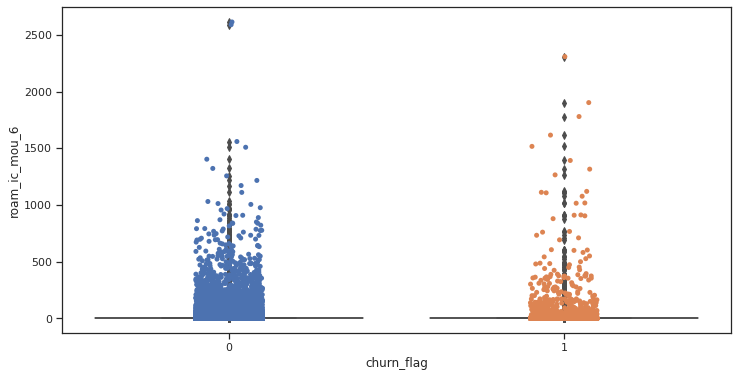

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='roam_ic_mou_6', data=highvalue)
sns.stripplot(x='churn_flag', y='roam_ic_mou_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# loc_og_mou 
(within the circle outgoing calls)

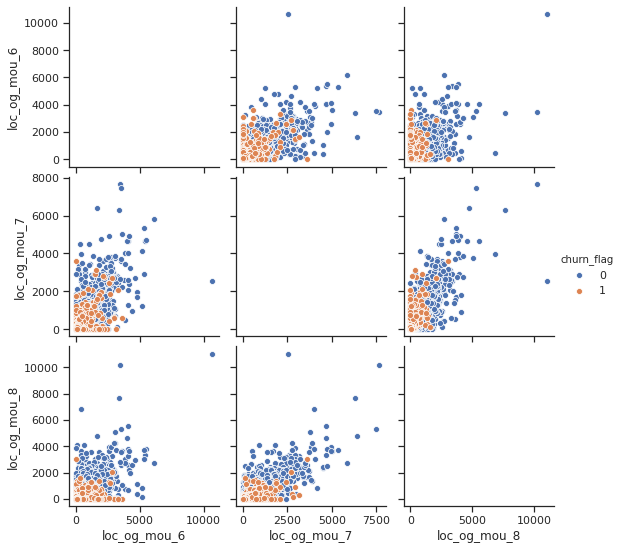

In [60]:
sns.pairplot(data=highvalue[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

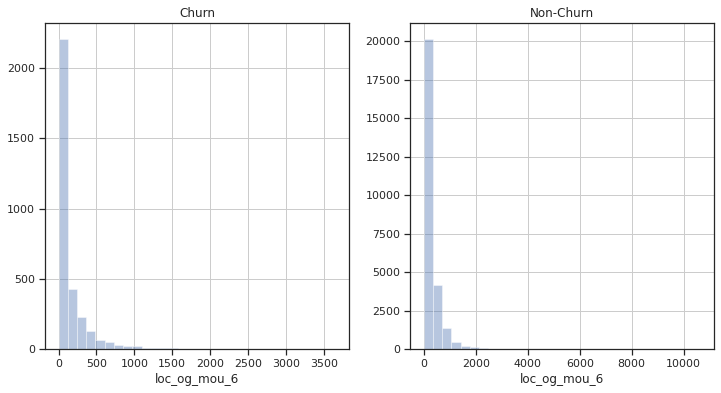

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].loc_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].loc_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

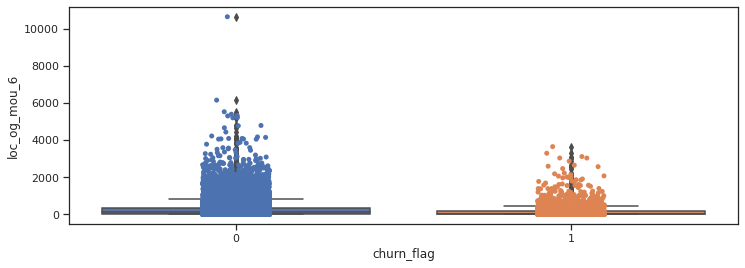

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='loc_og_mou_6', data=highvalue)
sns.stripplot(x='churn_flag', y='loc_og_mou_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# std_og_mou 
(Outside calling circle/zone calls)

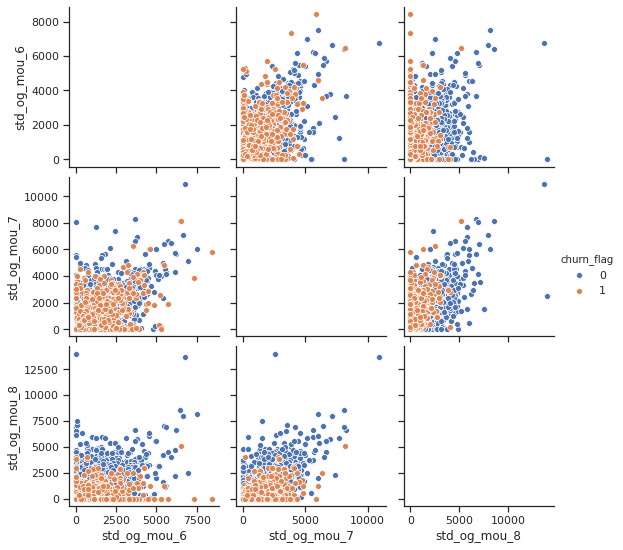

In [63]:
sns.pairplot(data=highvalue[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

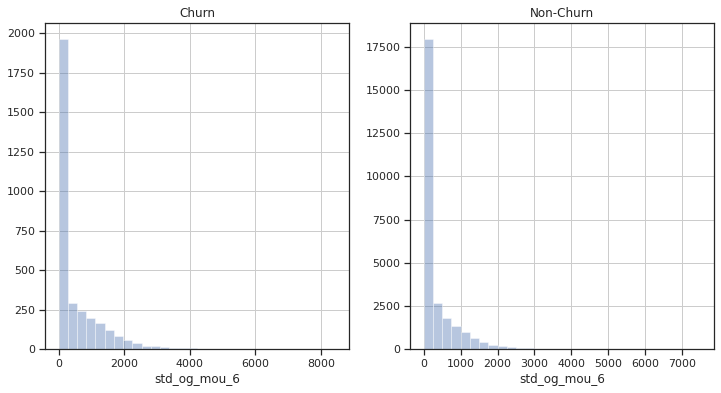

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].std_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].std_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

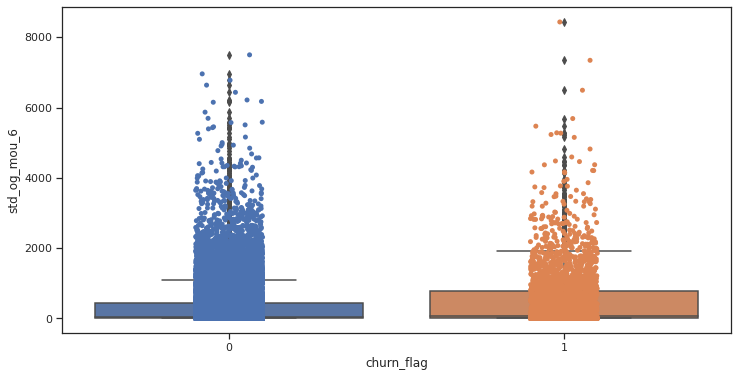

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='std_og_mou_6', data=highvalue)
sns.stripplot(x='churn_flag', y='std_og_mou_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# isd_og 
(international calling)

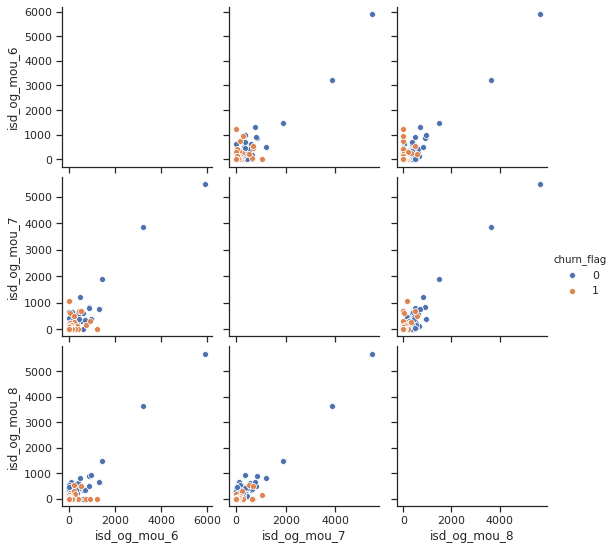

In [66]:
sns.pairplot(data=highvalue[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

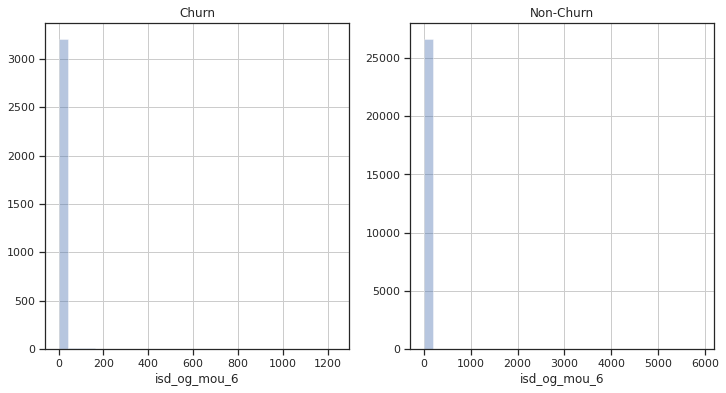

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].isd_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].isd_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

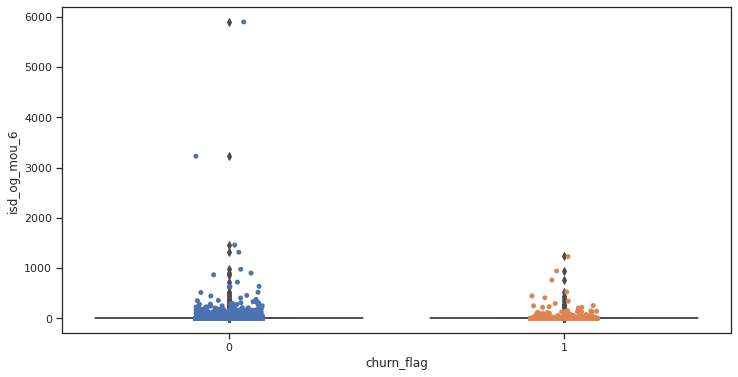

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='isd_og_mou_6', data=highvalue)
sns.stripplot(x='churn_flag', y='isd_og_mou_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# total_og_
(All outgoing calls by the customer)

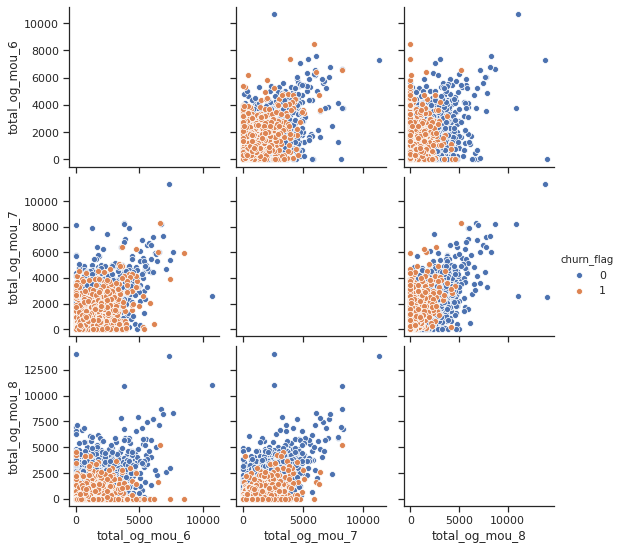

In [69]:
sns.pairplot(data=highvalue[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

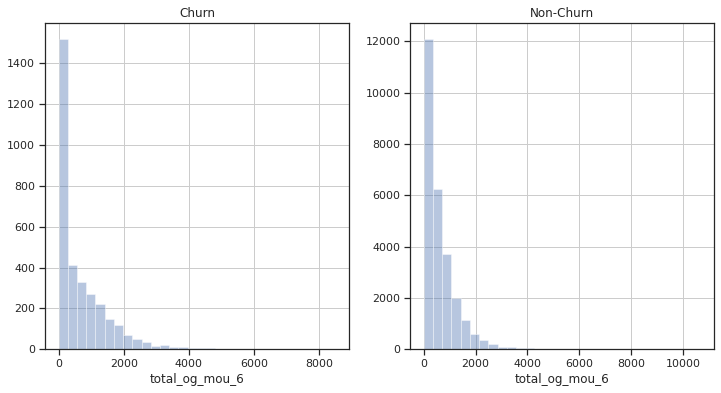

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].total_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].total_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

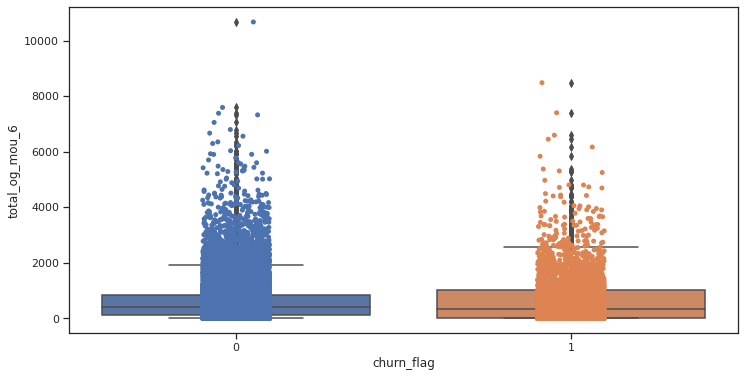

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='total_og_mou_6', data=highvalue)
sns.stripplot(x='churn_flag', y='total_og_mou_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# loc_ic_ 
(incoming local calls)

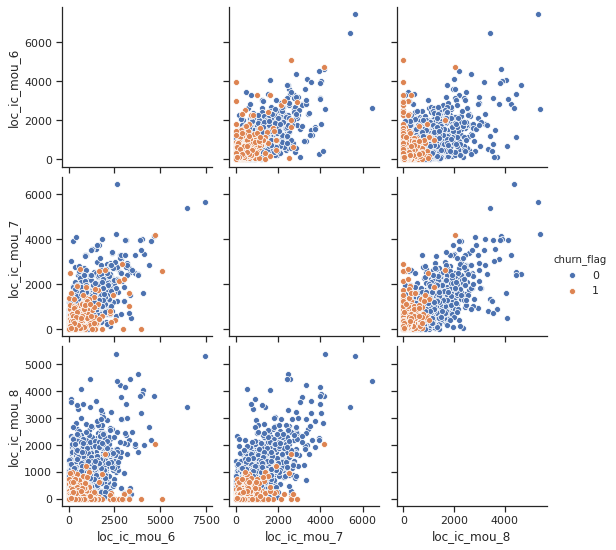

In [72]:
sns.pairplot(data=highvalue[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

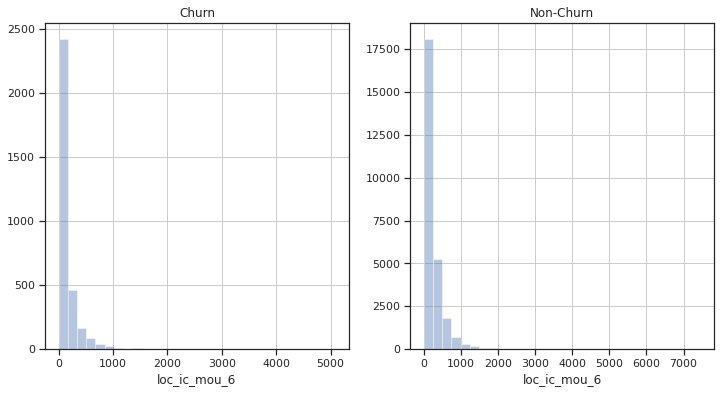

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].loc_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].loc_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

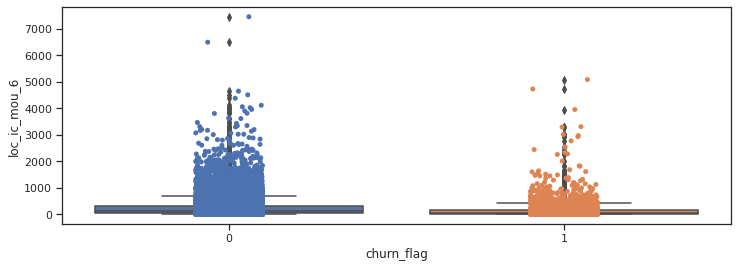

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='loc_ic_mou_6', data=highvalue)
sns.stripplot(x='churn_flag', y='loc_ic_mou_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# std_ic_ 
(Outside circle incoming calls)

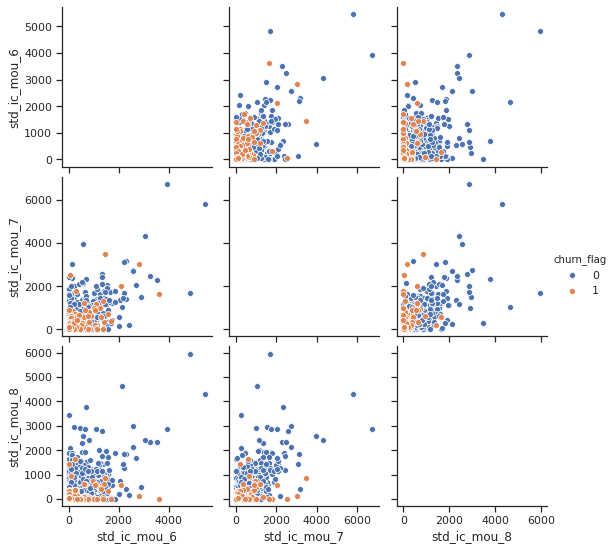

In [75]:
sns.pairplot(data=highvalue[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

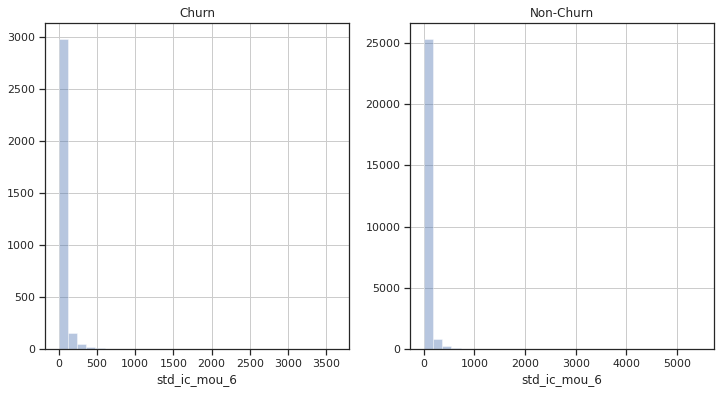

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].std_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].std_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

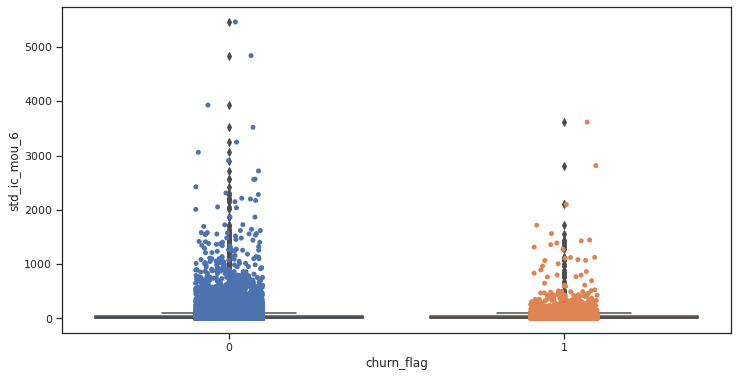

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='std_ic_mou_6', data=highvalue)
sns.stripplot(x='churn_flag', y='std_ic_mou_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# total_ic_ 
(All incoming calls received by a person)

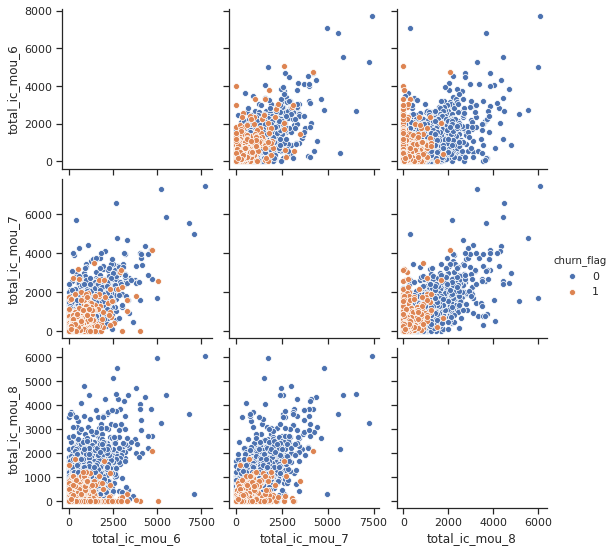

In [78]:
sns.pairplot(data=highvalue[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

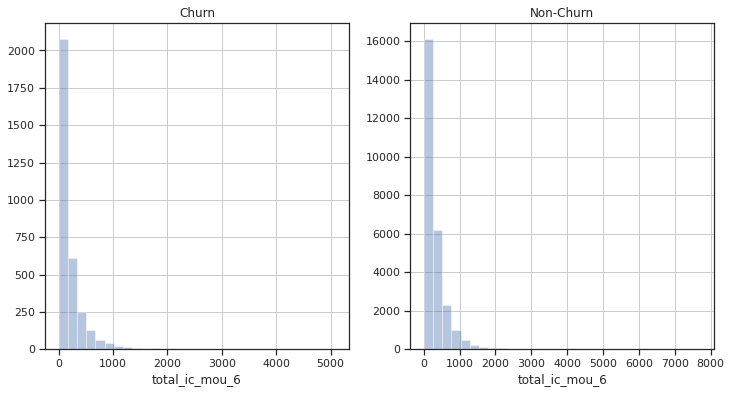

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].total_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].total_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

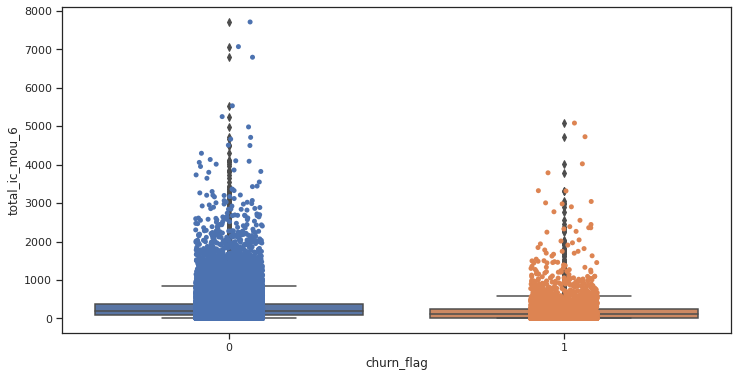

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,6))
sns.boxplot(x='churn_flag', y='total_ic_mou_6', data=highvalue)
sns.stripplot(x='churn_flag', y='total_ic_mou_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# total_rech_num_
(Number of times a subscriber recharged his mobile)

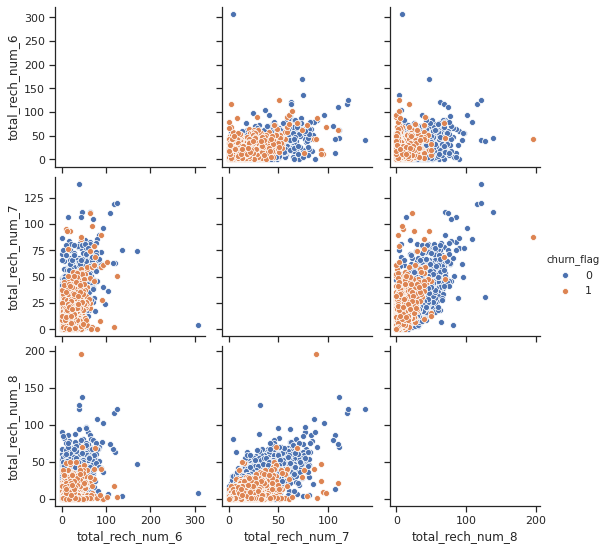

In [81]:
sns.pairplot(data=highvalue[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

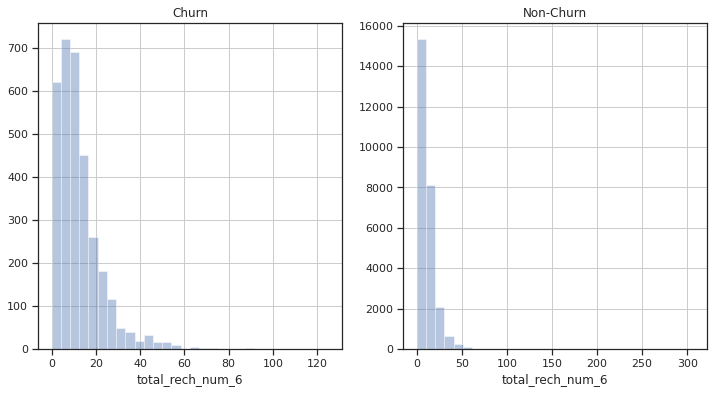

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].total_rech_num_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].total_rech_num_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

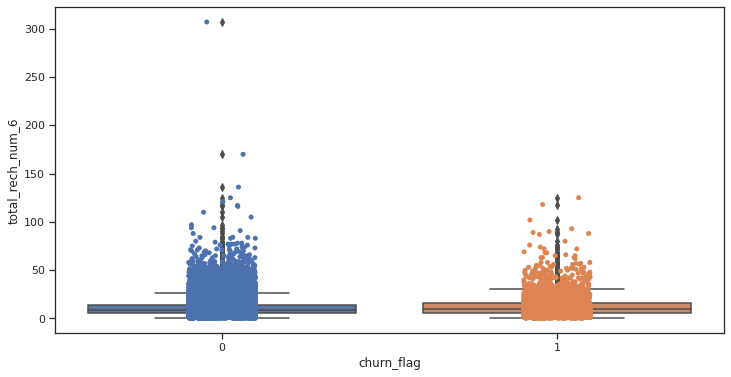

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='total_rech_num_6', data=highvalue)
sns.stripplot(x='churn_flag', y='total_rech_num_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# total_rech_amt_ 
Total recharge amount in a particular month

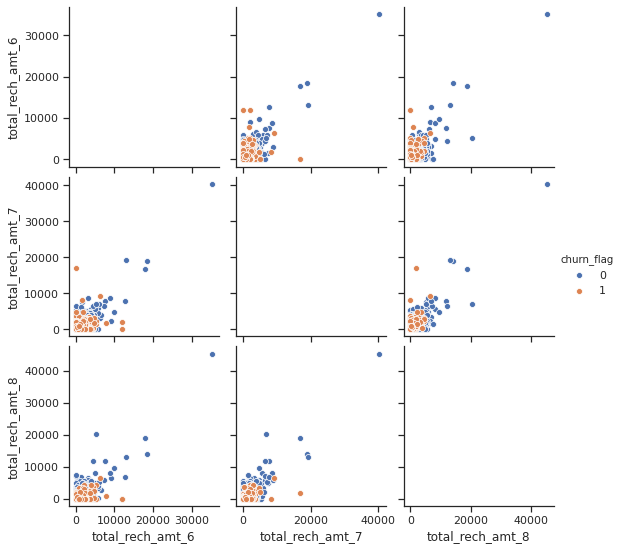

In [84]:
sns.pairplot(data=highvalue[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

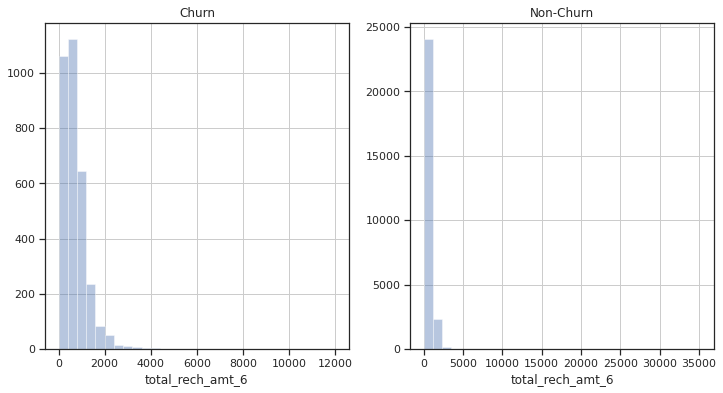

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].total_rech_amt_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].total_rech_amt_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

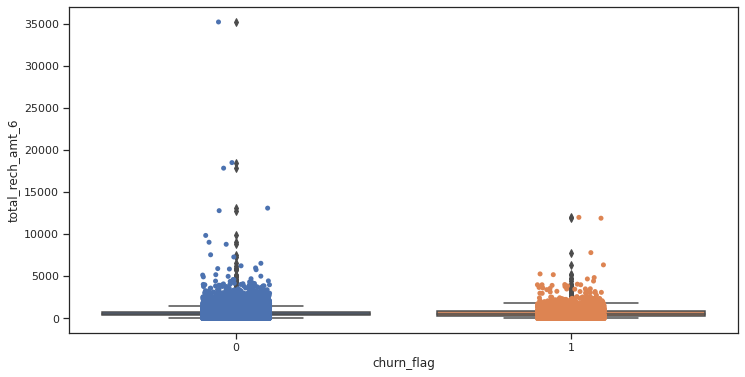

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='total_rech_amt_6', data=highvalue)
sns.stripplot(x='churn_flag', y='total_rech_amt_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# total_rech_data_ 
Total number of times mobile data has been recharged

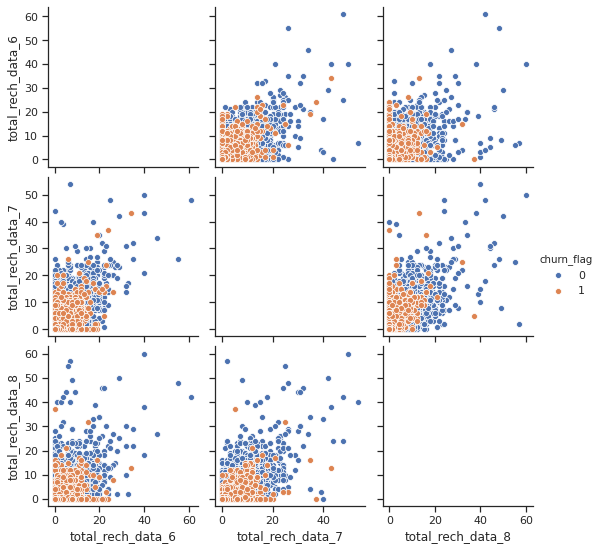

In [87]:
sns.pairplot(data=highvalue[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

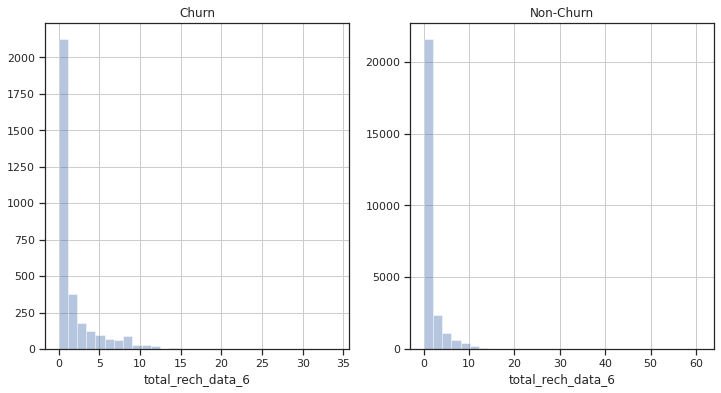

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].total_rech_data_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].total_rech_data_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

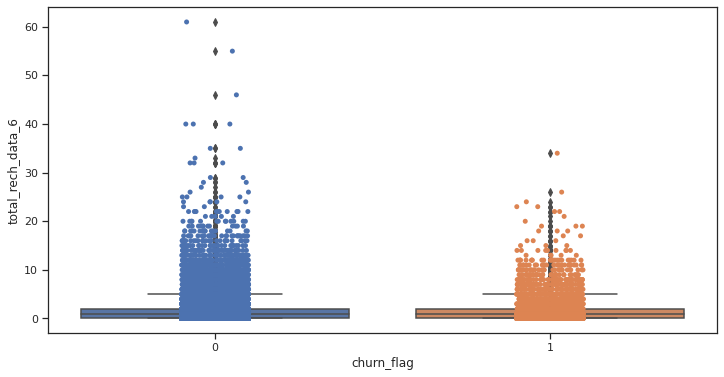

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='total_rech_data_6', data=highvalue)
sns.stripplot(x='churn_flag', y='total_rech_data_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# vol_2g_mb_
Internet usage in MB

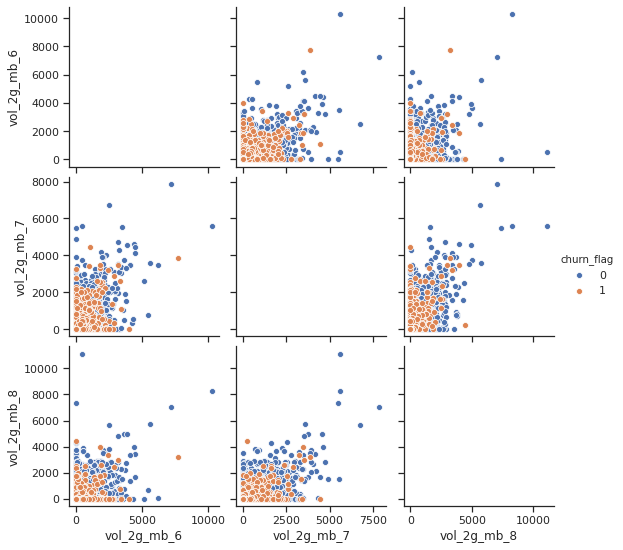

In [90]:
sns.pairplot(data=highvalue[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

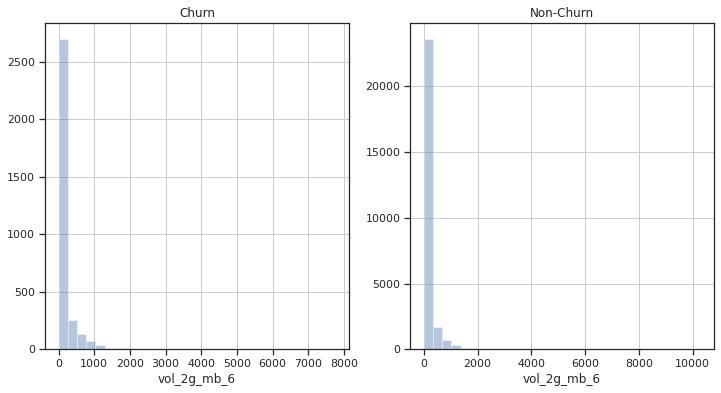

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].vol_2g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].vol_2g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

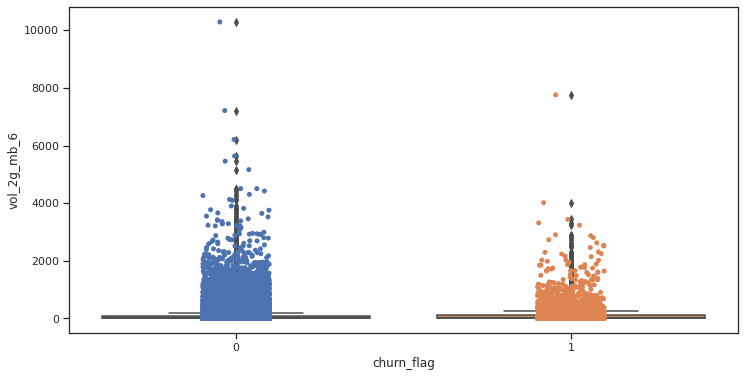

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='vol_2g_mb_6', data=highvalue)
sns.stripplot(x='churn_flag', y='vol_2g_mb_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# vol_3g_mb_
Internet usage in MB

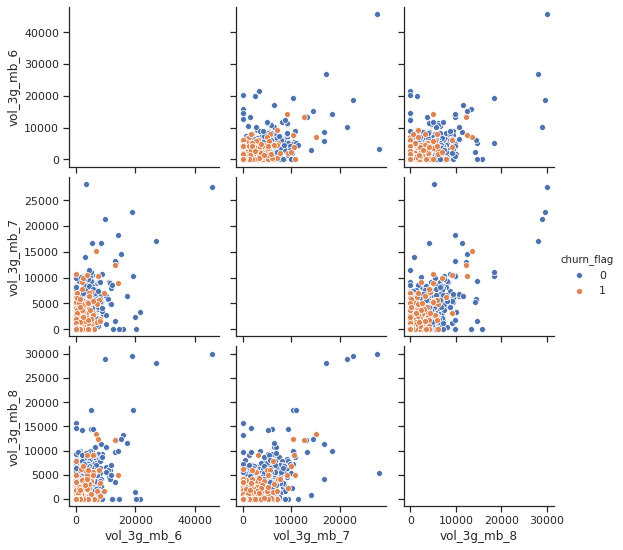

In [93]:
sns.pairplot(data=highvalue[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

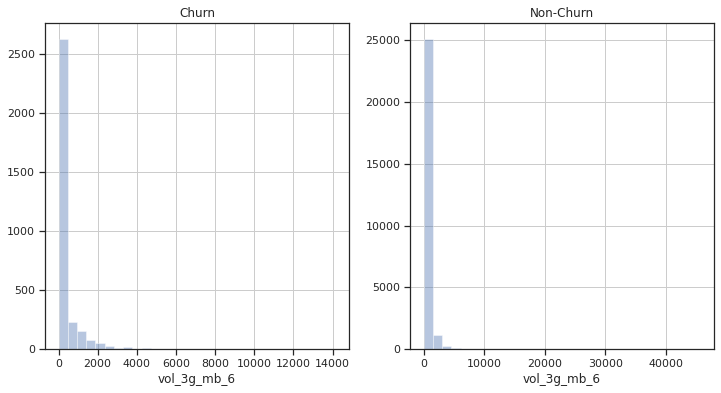

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].vol_3g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].vol_3g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

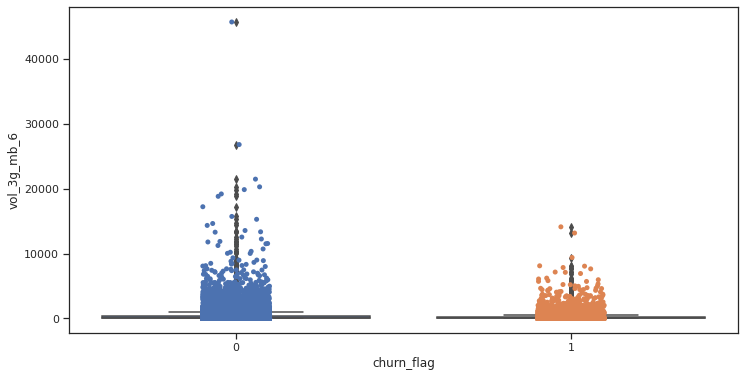

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='vol_3g_mb_6', data=highvalue)
sns.stripplot(x='churn_flag', y='vol_3g_mb_6', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

# vbc_3g_
Volume based cost - paid as per usage

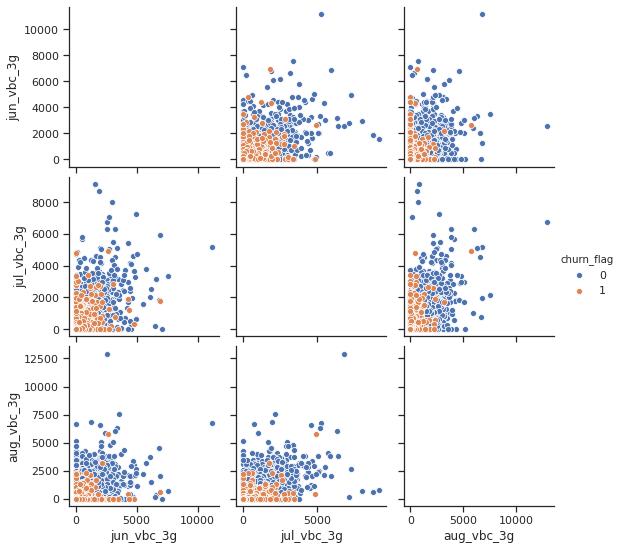

In [96]:
sns.pairplot(data=highvalue[['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','churn_flag']],hue='churn_flag',diag_kind='None')
plt.show()

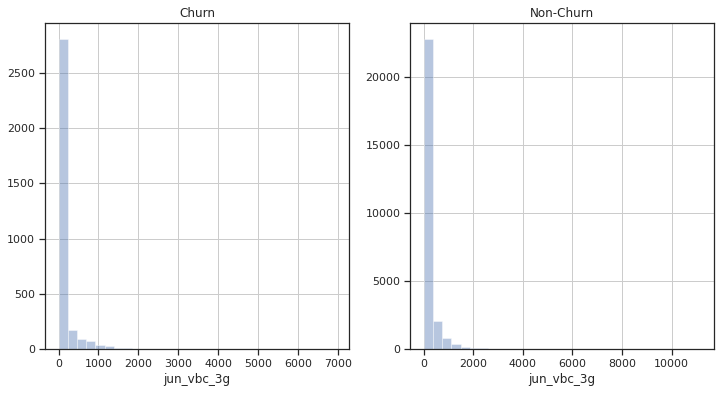

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].jun_vbc_3g, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].jun_vbc_3g, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

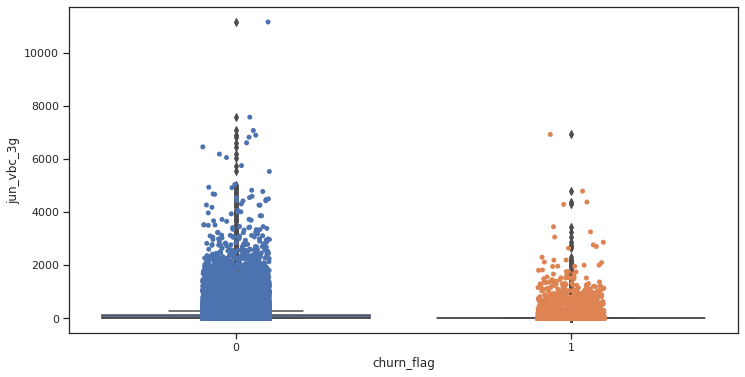

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='churn_flag', y='jun_vbc_3g', data=highvalue)
sns.stripplot(x='churn_flag', y='jun_vbc_3g', data=highvalue, jitter=True, edgecolor="gray")
plt.show()

We can see few observations across the features, which have a different behavior. 

Nearly 2.5% to 10% are tagged as outliers based on the feature.

We check the pattern between churn vs non-churn it's same across them and also it's same across the features as well. 

Therefore, we shouldn't exclude them from the model.

# Derived features

In [99]:
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 164 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             29953 non-null  int64  
 1   arpu_6                    29953 non-null  float64
 2   arpu_7                    29953 non-null  float64
 3   arpu_8                    29953 non-null  float64
 4   onnet_mou_6               29953 non-null  float64
 5   onnet_mou_7               29953 non-null  float64
 6   onnet_mou_8               29953 non-null  float64
 7   offnet_mou_6              29953 non-null  float64
 8   offnet_mou_7              29953 non-null  float64
 9   offnet_mou_8              29953 non-null  float64
 10  roam_ic_mou_6             29953 non-null  float64
 11  roam_ic_mou_7             29953 non-null  float64
 12  roam_ic_mou_8             29953 non-null  float64
 13  roam_og_mou_6             29953 non-null  float64
 14  roam_

In [100]:
#Let's first start formating date features

In [101]:
highvalue['date_of_last_rech_6'] = pd.to_datetime(highvalue['date_of_last_rech_6'])
highvalue['date_of_last_rech_7'] = pd.to_datetime(highvalue['date_of_last_rech_7'])
highvalue['date_of_last_rech_8'] = pd.to_datetime(highvalue['date_of_last_rech_8'])
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 164 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mobile_number             29953 non-null  int64         
 1   arpu_6                    29953 non-null  float64       
 2   arpu_7                    29953 non-null  float64       
 3   arpu_8                    29953 non-null  float64       
 4   onnet_mou_6               29953 non-null  float64       
 5   onnet_mou_7               29953 non-null  float64       
 6   onnet_mou_8               29953 non-null  float64       
 7   offnet_mou_6              29953 non-null  float64       
 8   offnet_mou_7              29953 non-null  float64       
 9   offnet_mou_8              29953 non-null  float64       
 10  roam_ic_mou_6             29953 non-null  float64       
 11  roam_ic_mou_7             29953 non-null  float64       
 12  roam_ic_mou_8    

In [102]:
highvalue['date_of_last_rech_data_6'] = pd.to_datetime(highvalue['date_of_last_rech_data_6'])
highvalue['date_of_last_rech_data_7'] = pd.to_datetime(highvalue['date_of_last_rech_data_7'])
highvalue['date_of_last_rech_data_8'] = pd.to_datetime(highvalue['date_of_last_rech_data_8'])
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 164 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mobile_number             29953 non-null  int64         
 1   arpu_6                    29953 non-null  float64       
 2   arpu_7                    29953 non-null  float64       
 3   arpu_8                    29953 non-null  float64       
 4   onnet_mou_6               29953 non-null  float64       
 5   onnet_mou_7               29953 non-null  float64       
 6   onnet_mou_8               29953 non-null  float64       
 7   offnet_mou_6              29953 non-null  float64       
 8   offnet_mou_7              29953 non-null  float64       
 9   offnet_mou_8              29953 non-null  float64       
 10  roam_ic_mou_6             29953 non-null  float64       
 11  roam_ic_mou_7             29953 non-null  float64       
 12  roam_ic_mou_8    

In [103]:
highvalue['mobile_number'] = highvalue['mobile_number'].astype(str)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 164 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mobile_number             29953 non-null  object        
 1   arpu_6                    29953 non-null  float64       
 2   arpu_7                    29953 non-null  float64       
 3   arpu_8                    29953 non-null  float64       
 4   onnet_mou_6               29953 non-null  float64       
 5   onnet_mou_7               29953 non-null  float64       
 6   onnet_mou_8               29953 non-null  float64       
 7   offnet_mou_6              29953 non-null  float64       
 8   offnet_mou_7              29953 non-null  float64       
 9   offnet_mou_8              29953 non-null  float64       
 10  roam_ic_mou_6             29953 non-null  float64       
 11  roam_ic_mou_7             29953 non-null  float64       
 12  roam_ic_mou_8    

Create new features from the date columns

This may help us identifying if a particular day in a month or a week causing any issue

In [104]:
# Now let's create new features from date column
highvalue['date_of_last_rech_day_6'] = highvalue['date_of_last_rech_6'].dt.day
highvalue['date_of_last_rech_dayofwk_6'] = highvalue['date_of_last_rech_6'].dt.dayofweek.astype(str)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 166 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mobile_number                29953 non-null  object        
 1   arpu_6                       29953 non-null  float64       
 2   arpu_7                       29953 non-null  float64       
 3   arpu_8                       29953 non-null  float64       
 4   onnet_mou_6                  29953 non-null  float64       
 5   onnet_mou_7                  29953 non-null  float64       
 6   onnet_mou_8                  29953 non-null  float64       
 7   offnet_mou_6                 29953 non-null  float64       
 8   offnet_mou_7                 29953 non-null  float64       
 9   offnet_mou_8                 29953 non-null  float64       
 10  roam_ic_mou_6                29953 non-null  float64       
 11  roam_ic_mou_7                29953 non-n

In [105]:
highvalue['date_of_last_rech_day_7'] = highvalue['date_of_last_rech_7'].dt.day
highvalue['date_of_last_rech_dayofwk_7'] = highvalue['date_of_last_rech_7'].dt.dayofweek.astype(str)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 168 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mobile_number                29953 non-null  object        
 1   arpu_6                       29953 non-null  float64       
 2   arpu_7                       29953 non-null  float64       
 3   arpu_8                       29953 non-null  float64       
 4   onnet_mou_6                  29953 non-null  float64       
 5   onnet_mou_7                  29953 non-null  float64       
 6   onnet_mou_8                  29953 non-null  float64       
 7   offnet_mou_6                 29953 non-null  float64       
 8   offnet_mou_7                 29953 non-null  float64       
 9   offnet_mou_8                 29953 non-null  float64       
 10  roam_ic_mou_6                29953 non-null  float64       
 11  roam_ic_mou_7                29953 non-n

In [106]:
highvalue['date_of_last_rech_day_8'] = highvalue['date_of_last_rech_8'].dt.day
highvalue['date_of_last_rech_dayofwk_8'] = highvalue['date_of_last_rech_8'].dt.dayofweek.astype(str)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 170 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mobile_number                29953 non-null  object        
 1   arpu_6                       29953 non-null  float64       
 2   arpu_7                       29953 non-null  float64       
 3   arpu_8                       29953 non-null  float64       
 4   onnet_mou_6                  29953 non-null  float64       
 5   onnet_mou_7                  29953 non-null  float64       
 6   onnet_mou_8                  29953 non-null  float64       
 7   offnet_mou_6                 29953 non-null  float64       
 8   offnet_mou_7                 29953 non-null  float64       
 9   offnet_mou_8                 29953 non-null  float64       
 10  roam_ic_mou_6                29953 non-null  float64       
 11  roam_ic_mou_7                29953 non-n

In [107]:
highvalue['date_of_last_rech_data_day_6'] = highvalue['date_of_last_rech_data_6'].dt.day
highvalue['date_of_last_rech_data_dayofwk_6'] = highvalue['date_of_last_rech_data_6'].dt.dayofweek.astype(str)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 172 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   mobile_number                     29953 non-null  object        
 1   arpu_6                            29953 non-null  float64       
 2   arpu_7                            29953 non-null  float64       
 3   arpu_8                            29953 non-null  float64       
 4   onnet_mou_6                       29953 non-null  float64       
 5   onnet_mou_7                       29953 non-null  float64       
 6   onnet_mou_8                       29953 non-null  float64       
 7   offnet_mou_6                      29953 non-null  float64       
 8   offnet_mou_7                      29953 non-null  float64       
 9   offnet_mou_8                      29953 non-null  float64       
 10  roam_ic_mou_6                     29953 non-n

In [108]:
highvalue['date_of_last_rech_data_day_7'] = highvalue['date_of_last_rech_data_7'].dt.day
highvalue['date_of_last_rech_data_dayofwk_7'] = highvalue['date_of_last_rech_data_7'].dt.dayofweek.astype(str)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 174 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   mobile_number                     29953 non-null  object        
 1   arpu_6                            29953 non-null  float64       
 2   arpu_7                            29953 non-null  float64       
 3   arpu_8                            29953 non-null  float64       
 4   onnet_mou_6                       29953 non-null  float64       
 5   onnet_mou_7                       29953 non-null  float64       
 6   onnet_mou_8                       29953 non-null  float64       
 7   offnet_mou_6                      29953 non-null  float64       
 8   offnet_mou_7                      29953 non-null  float64       
 9   offnet_mou_8                      29953 non-null  float64       
 10  roam_ic_mou_6                     29953 non-n

In [109]:
highvalue['date_of_last_rech_data_day_8'] = highvalue['date_of_last_rech_data_8'].dt.day
highvalue['date_of_last_rech_data_dayofwk_8'] = highvalue['date_of_last_rech_data_8'].dt.dayofweek.astype(str)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 176 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   mobile_number                     29953 non-null  object        
 1   arpu_6                            29953 non-null  float64       
 2   arpu_7                            29953 non-null  float64       
 3   arpu_8                            29953 non-null  float64       
 4   onnet_mou_6                       29953 non-null  float64       
 5   onnet_mou_7                       29953 non-null  float64       
 6   onnet_mou_8                       29953 non-null  float64       
 7   offnet_mou_6                      29953 non-null  float64       
 8   offnet_mou_7                      29953 non-null  float64       
 9   offnet_mou_8                      29953 non-null  float64       
 10  roam_ic_mou_6                     29953 non-n

In [110]:
highvalue.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean   558.820058    561.160547    508.890301    260.900880    268.051744     
std    460.868223    480.028497    502.136278    459.853278    480.303238     
min   -2258.709000  -2014.045000  -945.808000    0.000000      0.000000       
25%    310.142000    310.071000    231.615000    17.090000     16.040000      
50%    482.354000    481.496000    427.604000    84.640000     82.830000      
75%    700.240000    698.829000    661.753000    290.490000    290.540000     
max    27731.088000  35145.834000  33543.624000  7376.710000   8157.780000    

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000    
mean   234.345252    373.800402    378.233106    335.123008    16.124001       
std    458.751242    482.712621    499.138982    481.985106    76.344227       
min    0.000000      0.000000      0.000000      0.000000      0.000000        
25%    10.440000     71.610000     69.980000     46.760000     0.000000        
50%    65.660000     222.560000    220.040000    182.840000    0.000000        
75%    240.630000    487.910000    494.030000    438.860000    0.000000        
max    10752.560000  8362.360000   9667.130000   14007.340000  2613.310000     

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count  29953.000000   29953.000000   29953.000000   29953.000000    
mean   12.646145      12.512269      26.596033      20.155134       
std    75.833558      74.179181      116.274169     96.134144       
min    0.000000       0.000000       0.000000       0.000000        
25%    0.000000       0.000000       0.000000       0.000000        
50%    0.000000       0.000000       0.000000       0.000000        
75%    0.000000       0.000000       0.000000       0.000000        
max    3813.290000    4169.810000    3775.110000    2812.040000     

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count  29953.000000   29953.000000      29953.000000      29953.000000       
mean   19.889295      84.574122         85.762835         78.153334          
std    104.799622     228.962993        240.702116        227.540167         
min    0.000000       0.000000          0.000000          0.000000           
25%    0.000000       4.380000          4.630000          2.540000           
50%    0.000000       24.360000         24.680000         20.740000          
75%    0.000000       78.060000         78.510000         72.130000          
max    5337.040000    6431.330000       7400.660000       10752.560000       

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count  29953.000000      29953.000000      29953.000000      29953.000000       
mean   163.309546        163.087606        151.810056        6.348347           
std    250.218928        241.683234        233.745412        22.139546          
min    0.000000          0.000000          0.000000          0.000000           
25%    19.210000         20.490000         13.130000         0.000000           
50%    77.260000         78.990000         67.790000         0.000000           
75%    209.030000        208.530000        197.030000        4.230000           
max    4729.740000       4557.140000       4961.330000       1466.030000        

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count  29953.000000      29953.000000      29953.000000      29953.000000       
mean   6.426493          5.891865          1.577380          1.888737           
std    21.957189         19.516259         6.308138          9.143628           
min    0.000000          0.000000          0.000000          0.000000           
25%    0.000000          0.000000          0.000000          0.000000           
50%    0.100000          0.000000      

Let's check the correlation between features

In [111]:
joincorr= highvalue.corr()
highvalue_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
highvalue_corr[((highvalue_corr[0] < 1) & (highvalue_corr[0] >= 0.4)) | 
               ((highvalue_corr[0] <= -0.4) & (highvalue_corr[0] > -1))]

level_0                       level_1         0
18067  count_rech_2g_8               sachet_2g_8                   0.987175
22441  sachet_2g_8                   count_rech_2g_8               0.987175
17903  count_rech_2g_7               sachet_2g_7                   0.986423
22277  sachet_2g_7                   count_rech_2g_7               0.986423
22113  sachet_2g_6                   count_rech_2g_6               0.984939
17739  count_rech_2g_6               sachet_2g_6                   0.984939
421    arpu_8                        total_rech_amt_8              0.955322
15487  total_rech_amt_8              arpu_8                        0.955322
15159  total_rech_amt_6              arpu_6                        0.946104
93     arpu_6                        total_rech_amt_6              0.946104
15323  total_rech_amt_7              arpu_7                        0.943571
257    arpu_7                        total_rech_amt_7              0.943571
7215   isd_og_mou_8                  isd_og_mou_7                  0.943120
7053   isd_og_mou_7                  isd_og_mou_8                  0.943120
20661  arpu_2g_6                     arpu_3g_6                     0.940080
20175  arpu_3g_6                     arpu_2g_6                     0.940080
20989  arpu_2g_8                     arpu_3g_8                     0.937734
20503  arpu_3g_8                     arpu_2g_8                     0.937734
20339  arpu_3g_7                     arpu_2g_7                     0.936434
20825  arpu_2g_7                     arpu_3g_7                     0.936434
25254  amt_data_7                    total_data_rech_7             0.934666
24930  total_data_rech_7             amt_data_7                    0.934666
24766  total_data_rech_6             amt_data_6                    0.934075
25090  amt_data_6                    total_data_rech_6             0.934075
6890   isd_og_mou_6                  isd_og_mou_8                  0.918187
7214   isd_og_mou_8                  isd_og_mou_6                  0.918187
6889   isd_og_mou_6                  isd_og_mou_7                  0.915247
7051   isd_og_mou_7                  isd_og_mou_6                  0.915247
16734  total_rech_data_6             count_rech_2g_6               0.911366
17706  count_rech_2g_6               total_rech_data_6             0.911366
16898  total_rech_data_7             count_rech_2g_7               0.910260
17870  count_rech_2g_7               total_rech_data_7             0.910260
18034  count_rech_2g_8               total_rech_data_8             0.906649
17062  total_rech_data_8             count_rech_2g_8               0.906649
16925  total_rech_data_7             sachet_2g_7                   0.904233
22271  sachet_2g_7                   total_rech_data_7             0.904233
16761  total_rech_data_6             sachet_2g_6                   0.903868
22107  sachet_2g_6                   total_rech_data_6             0.903868
17089  total_rech_data_8             sachet_2g_8                   0.900628
22435  sachet_2g_8                   total_rech_data_8             0.900628
10347  loc_ic_mou_6                  total_ic_mou_6                0.896444
12777  total_ic_mou_6                loc_ic_mou_6                  0.896444
13105  total_ic_mou_8                loc_ic_mou_8                  0.896204
10675  loc_ic_mou_8                  total_ic_mou_8                0.896204
12941  total_ic_mou_7                loc_ic_mou_7                  0.884392
10511  loc_ic_mou_7                  total_ic_mou_7                0.884392
23422  sachet_3g_8                   count_rech_3g_8               0.875300
18562  count_rech_3g_8               sachet_3g_8                   0.875300
847    onnet_mou_8                   std_og_t2t_mou_8              0.860648
5221   std_og_t2t_mou_8              onnet_mou_8                   0.860648
683    onnet_mou_7                   std_og_t2t_mou_7              0.860314
5057   std_og_t2t_mou_7              onnet_mou_7                   0.860314


From the above we can notice high correlation between same features and only month differs.

We can eliminate as we will lose information of either good or action month.

Create new features from good month and compare them with action phase

In [112]:
highvalue['AVG_arpu_6_7'] = highvalue[['arpu_6','arpu_7']].mean(axis=1)
highvalue['is_arpu_flag'] = np.where((highvalue['arpu_8'] > highvalue['AVG_arpu_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [113]:
highvalue['AVG_onnet_mou_6_7'] = highvalue[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
highvalue['is_onnet_mou_flag'] = np.where((highvalue['onnet_mou_8'] > highvalue['AVG_onnet_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [114]:
highvalue['AVG_offnet_mou_6_7'] = highvalue[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
highvalue['is_offnet_mou_flag'] = np.where((highvalue['offnet_mou_8'] > highvalue['AVG_offnet_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [115]:
highvalue['AVG_roam_ic_mou_6_7'] = highvalue[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
highvalue['is_roam_ic_mou_flag'] = np.where((highvalue['roam_ic_mou_8'] > highvalue['AVG_roam_ic_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [116]:
highvalue['AVG_roam_og_mou_6_7'] = highvalue[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
highvalue['is_roam_og_mou_flag'] = np.where((highvalue['roam_og_mou_8'] > highvalue['AVG_roam_og_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [117]:
highvalue['AVG_loc_og_t2t_mou_6_7'] = highvalue[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
highvalue['is_loc_og_t2t_mou_flag'] = np.where((highvalue['loc_og_t2t_mou_8'] > highvalue['AVG_loc_og_t2t_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [118]:
highvalue['AVG_loc_og_t2m_mou_6_7'] = highvalue[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
highvalue['is_loc_og_t2m_mou_flag'] = np.where((highvalue['loc_og_t2m_mou_8'] > highvalue['AVG_loc_og_t2m_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [119]:
highvalue['AVG_loc_og_t2f_mou_6_7'] = highvalue[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
highvalue['is_loc_og_t2f_mou_flag'] = np.where((highvalue['loc_og_t2f_mou_8'] > highvalue['AVG_loc_og_t2f_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [120]:
highvalue['AVG_loc_og_t2c_mou_6_7'] = highvalue[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
highvalue['is_loc_og_t2c_mou_flag'] = np.where((highvalue['loc_og_t2c_mou_8'] > highvalue['AVG_loc_og_t2c_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [121]:
highvalue['AVG_std_og_t2t_mou_6_7'] = highvalue[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
highvalue['is_std_og_t2t_mou_flag'] = np.where((highvalue['std_og_t2t_mou_8'] > highvalue['AVG_std_og_t2t_mou_6_7']), 0, 1)
highvalue.head()



mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [122]:
highvalue['AVG_std_og_t2m_mou_6_7'] = highvalue[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
highvalue['is_std_og_t2m_mou_flag'] = np.where((highvalue['std_og_t2m_mou_8'] > highvalue['AVG_std_og_t2m_mou_6_7']), 0, 1)
highvalue.head()



mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [123]:
highvalue['AVG_std_og_t2f_mou_6_7'] = highvalue[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
highvalue['is_std_og_t2f_mou_flag'] = np.where((highvalue['std_og_t2f_mou_8'] > highvalue['AVG_std_og_t2f_mou_6_7']), 0, 1)
highvalue.head()



mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [124]:
highvalue['AVG_isd_og_mou_6_7'] = highvalue[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
highvalue['is_isd_og_mou_flag'] = np.where((highvalue['isd_og_mou_8'] > highvalue['AVG_isd_og_mou_6_7']), 0, 1)
highvalue.head()



mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [125]:
highvalue['AVG_spl_og_mou_6_7'] = highvalue[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
highvalue['is_spl_og_mou_flag'] = np.where((highvalue['spl_og_mou_8'] > highvalue['AVG_spl_og_mou_6_7']), 0, 1)
highvalue.head()



mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [126]:
highvalue['AVG_og_others_6_7'] = highvalue[['og_others_6','og_others_7']].mean(axis=1)
highvalue['is_og_others_flag'] = np.where((highvalue['og_others_8'] > highvalue['AVG_og_others_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [127]:
highvalue['AVG_loc_ic_t2t_mou_6_7'] = highvalue[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
highvalue['is_loc_ic_t2t_mou_flag'] = np.where((highvalue['loc_ic_t2t_mou_8'] > highvalue['AVG_loc_ic_t2t_mou_6_7']), 0, 1)
highvalue.head()


mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [128]:
highvalue['AVG_loc_ic_t2m_mou_6_7'] = highvalue[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
highvalue['is_loc_ic_t2m_mou_flag'] = np.where((highvalue['loc_ic_t2m_mou_8'] > highvalue['AVG_loc_ic_t2m_mou_6_7']), 0, 1)
highvalue.head()


mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [129]:
highvalue['AVG_loc_ic_t2f_mou_6_7'] = highvalue[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
highvalue['is_loc_ic_t2f_mou_flag'] = np.where((highvalue['loc_ic_t2f_mou_8'] > highvalue['AVG_loc_ic_t2f_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [130]:
highvalue['AVG_std_ic_t2t_mou_6_7'] = highvalue[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
highvalue['is_std_ic_t2t_mou_flag'] = np.where((highvalue['std_ic_t2t_mou_8'] > highvalue['AVG_std_ic_t2t_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [131]:
highvalue['AVG_std_ic_t2m_mou_6_7'] = highvalue[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
highvalue['is_std_ic_t2m_mou_flag'] = np.where((highvalue['std_ic_t2m_mou_8'] > highvalue['AVG_std_ic_t2m_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [132]:
highvalue['AVG_std_ic_t2f_mou_6_7'] = highvalue[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
highvalue['is_std_ic_t2f_mou_flag'] = np.where((highvalue['std_ic_t2f_mou_8'] > highvalue['AVG_std_ic_t2f_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [133]:
highvalue['AVG_spl_ic_mou_6_7'] = highvalue[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
highvalue['is_spl_ic_mou_flag'] = np.where((highvalue['spl_ic_mou_8'] > highvalue['AVG_spl_ic_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [134]:
highvalue['AVG_isd_ic_mou_6_7'] = highvalue[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
highvalue['is_isd_ic_mou_flag'] = np.where((highvalue['isd_ic_mou_8'] > highvalue['AVG_isd_ic_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [135]:

highvalue['AVG_ic_others_6_7'] = highvalue[['ic_others_6','ic_others_7']].mean(axis=1)
highvalue['is_ic_others_flag'] = np.where((highvalue['ic_others_8'] > highvalue['AVG_ic_others_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [136]:

highvalue['AVG_total_rech_amt_6_7'] = highvalue[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
highvalue['is_total_rech_amt_flag'] = np.where((highvalue['total_rech_amt_8'] > highvalue['AVG_total_rech_amt_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [137]:

highvalue['AVG_vol_2g_mb_6_7'] = highvalue[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
highvalue['is_vol_2g_mb_flag'] = np.where((highvalue['vol_2g_mb_8'] > highvalue['AVG_vol_2g_mb_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [138]:

highvalue['AVG_vol_3g_mb_6_7'] = highvalue[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
highvalue['is_vol_3g_mb_flag'] = np.where((highvalue['vol_3g_mb_8'] > highvalue['AVG_vol_3g_mb_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [139]:

highvalue['AVG_arpu_3g_6_7'] = highvalue[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
highvalue['is_arpu_3g_flag'] = np.where((highvalue['arpu_3g_8'] > highvalue['AVG_arpu_3g_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [140]:
highvalue['AVG_arpu_2g_6_7'] = highvalue[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
highvalue['is_arpu_2g_flag'] = np.where((highvalue['arpu_2g_8'] > highvalue['AVG_arpu_2g_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [141]:
highvalue['AVG_vbc_3g_6_7'] = highvalue[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
highvalue['is_vbc_3g_flag'] = np.where((highvalue['aug_vbc_3g'] > highvalue['AVG_vbc_3g_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [142]:
highvalue['AVG_loc_og_mou_6_7'] = highvalue[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
highvalue['is_loc_og_mou_flag'] = np.where((highvalue['loc_og_mou_8'] > highvalue['AVG_loc_og_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [143]:
highvalue['AVG_std_og_mou_6_7'] = highvalue[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
highvalue['is_std_og_mou_flag'] = np.where((highvalue['std_og_mou_8'] > highvalue['AVG_std_og_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [144]:
highvalue['AVG_total_og_mou_6_7'] = highvalue[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
highvalue['is_total_og_mou_flag'] = np.where((highvalue['total_og_mou_8'] > highvalue['AVG_total_og_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [145]:

highvalue['AVG_loc_ic_mou_6_7'] = highvalue[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
highvalue['is_loc_ic_mou_flag'] = np.where((highvalue['loc_ic_mou_8'] > highvalue['AVG_loc_ic_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [146]:

highvalue['AVG_std_ic_mou_6_7'] = highvalue[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
highvalue['is_std_ic_mou_flag'] = np.where((highvalue['std_ic_mou_8'] > highvalue['AVG_std_ic_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [147]:

highvalue['AVG_total_ic_mou_6_7'] = highvalue[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
highvalue['is_total_ic_mou_flag'] = np.where((highvalue['total_ic_mou_8'] > highvalue['AVG_total_ic_mou_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [148]:

highvalue['AVG_night_pck_user_6_7'] = highvalue[['night_pck_user_6','night_pck_user_7']].mean(axis=1)
highvalue['is_night_pck_user_flag'] = np.where((highvalue['night_pck_user_8'] > highvalue['AVG_night_pck_user_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [149]:

highvalue['AVG_monthly_2g_6_7'] = highvalue[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
highvalue['is_monthly_2g_flag'] = np.where((highvalue['monthly_2g_8'] > highvalue['AVG_monthly_2g_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [150]:

highvalue['AVG_sachet_2g_6_7'] = highvalue[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
highvalue['is_sachet_2g_flag'] = np.where((highvalue['sachet_2g_8'] > highvalue['AVG_sachet_2g_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [151]:
highvalue['AVG_monthly_3g_6_7'] = highvalue[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
highvalue['is_monthly_3g_flag'] = np.where((highvalue['monthly_3g_8'] > highvalue['AVG_monthly_3g_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [152]:
highvalue['AVG_sachet_3g_6_7'] = highvalue[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
highvalue['is_sachet_3g_flag'] = np.where((highvalue['sachet_3g_8'] > highvalue['AVG_sachet_3g_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [153]:
highvalue['AVG_fb_user_6_7'] = highvalue[['fb_user_6','fb_user_7']].mean(axis=1)
highvalue['is_fb_user_flag'] = np.where((highvalue['fb_user_8'] > highvalue['AVG_fb_user_6_7']), 0, 1)
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

Create month on month change features to understand any risk associated with it

In [154]:
# Create month on month change features to understand any risk associated with the churn
highvalue['loc_og_t2t_mou_7diff6'] = highvalue['loc_og_t2t_mou_7'] - highvalue['loc_og_t2t_mou_6']
highvalue['loc_og_t2m_mou_7diff6'] = highvalue['loc_og_t2m_mou_7'] - highvalue['loc_og_t2m_mou_6']
highvalue['loc_og_t2f_mou_7diff6'] = highvalue['loc_og_t2f_mou_7'] - highvalue['loc_og_t2f_mou_6']
highvalue['loc_og_t2c_mou_7diff6'] = highvalue['loc_og_t2c_mou_7'] - highvalue['loc_og_t2c_mou_6']
highvalue['loc_og_mou_7diff6'] = highvalue['loc_og_mou_7'] - highvalue['loc_og_mou_6']
highvalue['std_og_t2t_mou_7diff6'] = highvalue['std_og_t2t_mou_7'] - highvalue['std_og_t2t_mou_6']
highvalue['std_og_t2m_mou_7diff6'] = highvalue['std_og_t2m_mou_7'] - highvalue['std_og_t2m_mou_6']
highvalue['std_og_t2f_mou_7diff6'] = highvalue['std_og_t2f_mou_7'] - highvalue['std_og_t2f_mou_6']
highvalue['std_og_mou_7diff6'] = highvalue['std_og_mou_7'] - highvalue['std_og_mou_6']
highvalue['loc_og_mou_7diff6'] = highvalue['loc_og_mou_7'] - highvalue['loc_og_mou_6']
highvalue['std_og_mou_7diff6'] = highvalue['std_og_mou_7'] - highvalue['std_og_mou_6']
highvalue['isd_og_mou_7diff6'] = highvalue['isd_og_mou_7'] - highvalue['isd_og_mou_6']
highvalue['spl_og_mou_7diff6'] = highvalue['spl_og_mou_7'] - highvalue['spl_og_mou_6']
highvalue['og_others_7diff6'] = highvalue['og_others_7'] - highvalue['og_others_6']
highvalue['total_og_mou_7diff6'] = highvalue['total_og_mou_7'] - highvalue['total_og_mou_6']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [155]:

highvalue['loc_og_t2t_mou_8diff7'] = highvalue['loc_og_t2t_mou_8'] - highvalue['loc_og_t2t_mou_7']
highvalue['loc_og_t2m_mou_8diff7'] = highvalue['loc_og_t2m_mou_8'] - highvalue['loc_og_t2m_mou_7']
highvalue['loc_og_t2f_mou_8diff7'] = highvalue['loc_og_t2f_mou_8'] - highvalue['loc_og_t2f_mou_7']
highvalue['loc_og_t2c_mou_8diff7'] = highvalue['loc_og_t2c_mou_8'] - highvalue['loc_og_t2c_mou_7']
highvalue['loc_og_mou_8diff7'] = highvalue['loc_og_mou_8'] - highvalue['loc_og_mou_7']
highvalue['std_og_t2t_mou_8diff7'] = highvalue['std_og_t2t_mou_8'] - highvalue['std_og_t2t_mou_7']
highvalue['std_og_t2m_mou_8diff7'] = highvalue['std_og_t2m_mou_8'] - highvalue['std_og_t2m_mou_7']
highvalue['std_og_t2f_mou_8diff7'] = highvalue['std_og_t2f_mou_8'] - highvalue['std_og_t2f_mou_7']
highvalue['std_og_mou_8diff7'] = highvalue['std_og_mou_8'] - highvalue['std_og_mou_7']
highvalue['loc_og_mou_8diff7'] = highvalue['loc_og_mou_8'] - highvalue['loc_og_mou_7']
highvalue['std_og_mou_8diff7'] = highvalue['std_og_mou_8'] - highvalue['std_og_mou_7']
highvalue['isd_og_mou_8diff7'] = highvalue['isd_og_mou_8'] - highvalue['isd_og_mou_7']
highvalue['spl_og_mou_8diff7'] = highvalue['spl_og_mou_8'] - highvalue['spl_og_mou_7']
highvalue['og_others_8diff7'] = highvalue['og_others_8'] - highvalue['og_others_7']
highvalue['total_og_mou_8diff7'] = highvalue['total_og_mou_8'] - highvalue['total_og_mou_7']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [156]:

highvalue['loc_ic_t2t_mou_7diff6'] = highvalue['loc_ic_t2t_mou_7'] - highvalue['loc_ic_t2t_mou_6']
highvalue['loc_ic_t2m_mou_7diff6'] = highvalue['loc_ic_t2m_mou_7'] - highvalue['loc_ic_t2m_mou_6']
highvalue['loc_ic_t2f_mou_7diff6'] = highvalue['loc_ic_t2f_mou_7'] - highvalue['loc_ic_t2f_mou_6']
highvalue['loc_ic_mou_7diff6'] = highvalue['loc_ic_mou_7'] - highvalue['loc_ic_mou_6']
highvalue['std_ic_t2t_mou_7diff6'] = highvalue['std_ic_t2t_mou_7'] - highvalue['std_ic_t2t_mou_6']
highvalue['std_ic_t2m_mou_7diff6'] = highvalue['std_ic_t2m_mou_7'] - highvalue['std_ic_t2m_mou_6']
highvalue['std_ic_t2f_mou_7diff6'] = highvalue['std_ic_t2f_mou_7'] - highvalue['std_ic_t2f_mou_6']
highvalue['std_ic_mou_7diff6'] = highvalue['std_ic_mou_7'] - highvalue['std_ic_mou_6']
highvalue['loc_ic_mou_7diff6'] = highvalue['loc_ic_mou_7'] - highvalue['loc_ic_mou_6']
highvalue['std_ic_mou_7diff6'] = highvalue['std_ic_mou_7'] - highvalue['std_ic_mou_6']
highvalue['spl_ic_mou_7diff6'] = highvalue['spl_ic_mou_7'] - highvalue['spl_ic_mou_6']
highvalue['isd_ic_mou_7diff6'] = highvalue['isd_ic_mou_7'] - highvalue['isd_ic_mou_6']
highvalue['ic_others_7diff6'] = highvalue['ic_others_7'] - highvalue['ic_others_6']
highvalue['total_ic_mou_7diff6'] = highvalue['total_ic_mou_7'] - highvalue['total_ic_mou_6']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [157]:

highvalue['loc_ic_t2t_mou_8diff7'] = highvalue['loc_ic_t2t_mou_8'] - highvalue['loc_ic_t2t_mou_7']
highvalue['loc_ic_t2m_mou_8diff7'] = highvalue['loc_ic_t2m_mou_8'] - highvalue['loc_ic_t2m_mou_7']
highvalue['loc_ic_t2f_mou_8diff7'] = highvalue['loc_ic_t2f_mou_8'] - highvalue['loc_ic_t2f_mou_7']
highvalue['loc_ic_mou_8diff7'] = highvalue['loc_ic_mou_8'] - highvalue['loc_ic_mou_7']
highvalue['std_ic_t2t_mou_8diff7'] = highvalue['std_ic_t2t_mou_8'] - highvalue['std_ic_t2t_mou_7']
highvalue['std_ic_t2m_mou_8diff7'] = highvalue['std_ic_t2m_mou_8'] - highvalue['std_ic_t2m_mou_7']
highvalue['std_ic_t2f_mou_8diff7'] = highvalue['std_ic_t2f_mou_8'] - highvalue['std_ic_t2f_mou_7']
highvalue['std_ic_mou_8diff7'] = highvalue['std_ic_mou_8'] - highvalue['std_ic_mou_7']
highvalue['loc_ic_mou_8diff7'] = highvalue['loc_ic_mou_8'] - highvalue['loc_ic_mou_7']
highvalue['std_ic_mou_8diff7'] = highvalue['std_ic_mou_8'] - highvalue['std_ic_mou_7']
highvalue['spl_ic_mou_8diff7'] = highvalue['spl_ic_mou_8'] - highvalue['spl_ic_mou_7']
highvalue['isd_ic_mou_8diff7'] = highvalue['isd_ic_mou_8'] - highvalue['isd_ic_mou_7']
highvalue['ic_others_8diff7'] = highvalue['ic_others_8'] - highvalue['ic_others_7']
highvalue['total_ic_mou_8diff7'] = highvalue['total_ic_mou_8'] - highvalue['total_ic_mou_7']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [158]:

highvalue['onnet_mou_7diff6'] = highvalue['onnet_mou_7'] - highvalue['onnet_mou_6']
highvalue['onnet_mou_8diff7'] = highvalue['onnet_mou_8'] - highvalue['onnet_mou_7']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [159]:

highvalue['offnet_mou_7diff6'] = highvalue['offnet_mou_7'] - highvalue['offnet_mou_6']
highvalue['offnet_mou_8diff7'] = highvalue['offnet_mou_8'] - highvalue['offnet_mou_7']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [160]:

highvalue['roam_ic_mou_7diff6'] = highvalue['roam_ic_mou_7'] - highvalue['roam_ic_mou_6']
highvalue['roam_ic_mou_8diff7'] = highvalue['roam_ic_mou_8'] - highvalue['roam_ic_mou_7']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [161]:
highvalue['roam_og_mou_7diff6'] = highvalue['roam_og_mou_7'] - highvalue['roam_og_mou_6']
highvalue['roam_og_mou_8diff7'] = highvalue['roam_og_mou_8'] - highvalue['roam_og_mou_7']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [162]:

highvalue['total_rech_amt_7diff6'] = highvalue['total_rech_amt_7'] - highvalue['total_rech_amt_6']
highvalue['total_rech_amt_8diff7'] = highvalue['total_rech_amt_8'] - highvalue['total_rech_amt_7']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [163]:
highvalue['date_of_last_rech_7diff6'] = (highvalue['date_of_last_rech_7'] - highvalue['date_of_last_rech_6']).dt.days
highvalue['date_of_last_rech_8diff7'] = (highvalue['date_of_last_rech_8'] - highvalue['date_of_last_rech_7']).dt.days
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [164]:

highvalue['date_of_last_rech_data_7diff6'] = (highvalue['date_of_last_rech_data_7'] - highvalue['date_of_last_rech_data_6']).dt.days
highvalue['date_of_last_rech_data_8diff7'] = (highvalue['date_of_last_rech_data_8'] - highvalue['date_of_last_rech_data_7']).dt.days
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [165]:

highvalue['vol_2g_mb_7diff6'] = highvalue['vol_2g_mb_7'] - highvalue['vol_2g_mb_6']
highvalue['vol_2g_mb_8diff7'] = highvalue['vol_2g_mb_8'] - highvalue['vol_2g_mb_7']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [166]:

highvalue['vol_3g_mb_7diff6'] = highvalue['vol_3g_mb_7'] - highvalue['vol_3g_mb_6']
highvalue['vol_3g_mb_8diff7'] = highvalue['vol_3g_mb_8'] - highvalue['vol_3g_mb_7']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [167]:

highvalue['vbc_3g_7diff6'] = highvalue['jul_vbc_3g'] - highvalue['jun_vbc_3g']
highvalue['vbc_3g_8diff7'] = highvalue['aug_vbc_3g'] - highvalue['jul_vbc_3g']
highvalue.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7000842753    197.385   214.816   213.803   0.00         0.00          
7   7000701601    1069.180  1349.850  3171.480  57.84        54.68         
8   7001524846    378.721   492.223   137.362   413.69       351.03        
21  7002124215    514.453   597.753   637.760   102.41       132.11        
23  7000887461    74.350    193.897   366.966   48.96        50.66         

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0   0.00         0.00          0.00          0.00          0.00            
7   52.29        453.43        567.16        325.91        16.23           
8   35.08        94.66         80.63         136.48        0.00            
21  85.14        757.93        896.68        983.39        0.00            
23  33.58        85.41         89.36         205.89        0.00            

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0   0.00           0.00           0.00           0.00           0.00            
7   33.49          31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0   0.00              0.00              0.00              0.00               
7   51.39             31.38             40.28             308.63             
8   297.13            217.59            12.49             80.96              
21  4.48              6.16              23.34             91.81              
23  48.96             50.66             33.58             82.94              

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0   0.00              0.00              0.00              0.00               
7   447.38            162.28            62.13             55.14              
8   70.58             50.54             0.00              0.00               
21  87.93             104.81            0.75              0.00               
23  83.01             148.56            0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0   0.00              0.0               0.0               0.00               
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0   0.00          0.00          0.00          0.00               
7   422.16        533.91        255.79        4.30               
8   378.09        288.18        63.04         116.56             
21  97.04         94.09         129.74        97.93              
23  131.91        133.68        182.14        0.00               

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0   0.00              0.00              0.00              0.00               
7   23.29             12.01             49.89             31.76              
8   133.43            22.58             13.69             10.04              
21  125.94            61.79             665.36            808.74             
23  0.00              0.00              2.36              6.35               

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0   0.00              0.00              0.00              0.00               
7   49.14             6.66              20.08             16.68              
8   75.69             0.00              0.00              0.00               
21  876.99       

In [168]:
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 330 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   mobile_number                     29953 non-null  object        
 1   arpu_6                            29953 non-null  float64       
 2   arpu_7                            29953 non-null  float64       
 3   arpu_8                            29953 non-null  float64       
 4   onnet_mou_6                       29953 non-null  float64       
 5   onnet_mou_7                       29953 non-null  float64       
 6   onnet_mou_8                       29953 non-null  float64       
 7   offnet_mou_6                      29953 non-null  float64       
 8   offnet_mou_7                      29953 non-null  float64       
 9   offnet_mou_8                      29953 non-null  float64       
 10  roam_ic_mou_6                     29953 non-n

# Feature Selection

#### What feature selection techniques could be used to reduce the number of features? 

There are several ways for feature selection:
To begin with all feature selection starts with some business domain knowledge. Variables that are relevant, available prior to modeling should be used. 
- Variables with no variance or single value should be eliminated. We did such an analysis of understanding the data and eliminated the variables. 
- Nominal data with no specific relevant to the modeling exercise can be removed- like mobile_number. 
- Variables like Date can be converted to numerical by extracting features like day of a week, day of a month etc.
- Categorical variables have to be encoded as dummy variables

Other more automated methods for feature selection are:
- Filter Methods – features are selected on the basis of their scores in various statistical tests for their relationship with the outcome variable. Eg: Correlation, Anova, Linear Discriminant analysis, Chi-square test 
- Wrapper Methods – Is like a search problem and is iterative.  We add/delete a subset of features, train a model iteratively until the best possible model is found. Examples are:
    - Forward selection
    - Backward selection
    - Recursive feature elimination


3)	Embedded Methods - Embedded methods combine the qualities of both filter and wrapper methods. These Algorithms that have their own built-in feature selection methodology implement it. Examples are:
    - Lasso Regression
    - Ridge Regression
    - Random Forest with Gini coefficient
    - Gradient boosting with feature importance


### Drop date related features as we derived new features out of it

In [169]:
highvalue.drop(list(highvalue.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 324 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   mobile_number                     29953 non-null  object 
 1   arpu_6                            29953 non-null  float64
 2   arpu_7                            29953 non-null  float64
 3   arpu_8                            29953 non-null  float64
 4   onnet_mou_6                       29953 non-null  float64
 5   onnet_mou_7                       29953 non-null  float64
 6   onnet_mou_8                       29953 non-null  float64
 7   offnet_mou_6                      29953 non-null  float64
 8   offnet_mou_7                      29953 non-null  float64
 9   offnet_mou_8                      29953 non-null  float64
 10  roam_ic_mou_6                     29953 non-null  float64
 11  roam_ic_mou_7                     29953 non-null  float64
 12  roa

Since we have the good data for both month 6, 7 as average, we don't need the raw columns, so dropping them

In [170]:
highvalue.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7',
                'roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7',
                 'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
                 'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
                 'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2m_mou_6','std_og_t2m_mou_7',
                 'std_og_t2f_mou_6','std_og_t2f_mou_7','isd_og_mou_6','isd_og_mou_7',
                 'spl_og_mou_6','spl_og_mou_7', 'og_others_6','og_others_7',
                 'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
                 'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
                 'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
                 'spl_ic_mou_6','spl_ic_mou_7', 'isd_ic_mou_6','isd_ic_mou_7',
                 'ic_others_6','ic_others_7', 'total_rech_amt_6','total_rech_amt_7',
                 'vol_2g_mb_6','vol_2g_mb_7', 'vol_3g_mb_6','vol_3g_mb_7',
                 'arpu_3g_6','arpu_3g_7', 'arpu_2g_6','arpu_2g_7',
                 'jun_vbc_3g','jul_vbc_3g', 'loc_og_mou_6', 'loc_og_mou_7','std_og_mou_6', 'std_og_mou_7',
                  'total_og_mou_6', 'total_og_mou_7','loc_ic_mou_6', 'loc_ic_mou_7',
                  'std_ic_mou_6', 'std_ic_mou_7','total_ic_mou_6', 'total_ic_mou_7',
                  'total_rech_num_6', 'total_rech_num_7','night_pck_user_6', 'night_pck_user_7',
                  'monthly_2g_6', 'monthly_2g_7','sachet_2g_6', 'sachet_2g_7',
                  'monthly_3g_6', 'monthly_3g_7','sachet_3g_6', 'sachet_3g_7','fb_user_6', 'fb_user_7'
        ], axis=1, inplace=True)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 238 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   mobile_number                     29953 non-null  object 
 1   arpu_8                            29953 non-null  float64
 2   onnet_mou_8                       29953 non-null  float64
 3   offnet_mou_8                      29953 non-null  float64
 4   roam_ic_mou_8                     29953 non-null  float64
 5   roam_og_mou_8                     29953 non-null  float64
 6   loc_og_t2t_mou_8                  29953 non-null  float64
 7   loc_og_t2m_mou_8                  29953 non-null  float64
 8   loc_og_t2f_mou_8                  29953 non-null  float64
 9   loc_og_t2c_mou_8                  29953 non-null  float64
 10  loc_og_mou_8                      29953 non-null  float64
 11  std_og_t2t_mou_8                  29953 non-null  float64
 12  std

In [171]:
highvalue.shape

(29953, 238)

In [172]:
correlation_matrix = highvalue.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]
correlated_pairs

[('arpu_8', 'total_rech_amt_8'),
 ('onnet_mou_8', 'std_og_t2t_mou_8'),
 ('offnet_mou_8', 'std_og_t2m_mou_8'),
 ('loc_og_t2t_mou_8', 'AVG_loc_og_t2t_mou_6_7'),
 ('loc_og_mou_8', 'AVG_loc_og_mou_6_7'),
 ('std_og_mou_8', 'total_og_mou_8'),
 ('isd_og_mou_8', 'AVG_isd_og_mou_6_7'),
 ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'),
 ('loc_ic_mou_8', 'total_ic_mou_8'),
 ('loc_ic_mou_8', 'AVG_loc_ic_mou_6_7'),
 ('std_ic_t2m_mou_8', 'std_ic_mou_8'),
 ('total_ic_mou_8', 'AVG_total_ic_mou_6_7'),
 ('total_rech_data_6', 'count_rech_2g_6'),
 ('total_rech_data_6', 'AVG_sachet_2g_6_7'),
 ('total_rech_data_7', 'count_rech_2g_7'),
 ('total_rech_data_7', 'AVG_sachet_2g_6_7'),
 ('total_rech_data_8', 'count_rech_2g_8'),
 ('total_rech_data_8', 'sachet_2g_8'),
 ('max_rech_data_8', 'av_rech_amt_data_8'),
 ('count_rech_2g_6', 'AVG_sachet_2g_6_7'),
 ('count_rech_2g_7', 'AVG_sachet_2g_6_7'),
 ('count_rech_2g_8', 'sachet_2g_8'),
 ('count_rech_3g_8', 'sachet_3g_8'),
 ('av_rech_amt_data_8', 'arpu_3g_8'),
 ('av_rech_amt_data_8

In [173]:
print("Total Number of correlated pairs: ", len(correlated_pairs))

Total Number of correlated pairs:  55


In [174]:
corr_matrix = highvalue.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop 

['std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'total_rech_amt_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'amt_data_6',
 'amt_data_7',
 'AVG_amt_data_6_7',
 'is_roam_og_mou_flag',
 'AVG_loc_og_t2t_mou_6_7',
 'AVG_std_og_t2t_mou_6_7',
 'AVG_std_og_t2m_mou_6_7',
 'AVG_isd_og_mou_6_7',
 'AVG_total_rech_amt_6_7',
 'AVG_arpu_3g_6_7',
 'AVG_arpu_2g_6_7',
 'AVG_loc_og_mou_6_7',
 'AVG_total_og_mou_6_7',
 'AVG_loc_ic_mou_6_7',
 'AVG_std_ic_mou_6_7',
 'AVG_total_ic_mou_6_7',
 'AVG_sachet_2g_6_7',
 'AVG_monthly_3g_6_7',
 'total_og_mou_7diff6',
 'total_og_mou_8diff7',
 'loc_ic_mou_7diff6',
 'std_ic_mou_7diff6',
 'total_ic_mou_7diff6',
 'total_ic_mou_8diff7',
 'onnet_mou_7diff6',
 'onnet_mou_8diff7',
 'offnet_mou_7diff6',
 'offnet_mou_8diff7']

In [175]:
highvalue.drop(columns=to_drop, axis=1,inplace=True)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 194 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   mobile_number                     29953 non-null  object 
 1   arpu_8                            29953 non-null  float64
 2   onnet_mou_8                       29953 non-null  float64
 3   offnet_mou_8                      29953 non-null  float64
 4   roam_ic_mou_8                     29953 non-null  float64
 5   roam_og_mou_8                     29953 non-null  float64
 6   loc_og_t2t_mou_8                  29953 non-null  float64
 7   loc_og_t2m_mou_8                  29953 non-null  float64
 8   loc_og_t2f_mou_8                  29953 non-null  float64
 9   loc_og_t2c_mou_8                  29953 non-null  float64
 10  loc_og_mou_8                      29953 non-null  float64
 11  std_og_t2f_mou_8                  29953 non-null  float64
 12  std

In [176]:
highvalue.shape

(29953, 194)

In [177]:
highvalue.drop(columns = list(highvalue.select_dtypes(include=['category']).columns), axis =1, inplace = True)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 194 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   mobile_number                     29953 non-null  object 
 1   arpu_8                            29953 non-null  float64
 2   onnet_mou_8                       29953 non-null  float64
 3   offnet_mou_8                      29953 non-null  float64
 4   roam_ic_mou_8                     29953 non-null  float64
 5   roam_og_mou_8                     29953 non-null  float64
 6   loc_og_t2t_mou_8                  29953 non-null  float64
 7   loc_og_t2m_mou_8                  29953 non-null  float64
 8   loc_og_t2f_mou_8                  29953 non-null  float64
 9   loc_og_t2c_mou_8                  29953 non-null  float64
 10  loc_og_mou_8                      29953 non-null  float64
 11  std_og_t2f_mou_8                  29953 non-null  float64
 12  std

In [178]:
list(highvalue.select_dtypes(include=[object]).columns)

['mobile_number',
 'date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [179]:
highvalue.drop(columns = list(highvalue.select_dtypes(include=[object]).columns), axis = 1, inplace = True)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 187 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   arpu_8                         29953 non-null  float64
 1   onnet_mou_8                    29953 non-null  float64
 2   offnet_mou_8                   29953 non-null  float64
 3   roam_ic_mou_8                  29953 non-null  float64
 4   roam_og_mou_8                  29953 non-null  float64
 5   loc_og_t2t_mou_8               29953 non-null  float64
 6   loc_og_t2m_mou_8               29953 non-null  float64
 7   loc_og_t2f_mou_8               29953 non-null  float64
 8   loc_og_t2c_mou_8               29953 non-null  float64
 9   loc_og_mou_8                   29953 non-null  float64
 10  std_og_t2f_mou_8               29953 non-null  float64
 11  std_og_mou_8                   29953 non-null  float64
 12  isd_og_mou_8                   29953 non-null

In [180]:
#Replace all missing values with zero as discussed above

In [181]:
highvalue.replace([np.inf, -np.inf], np.nan,inplace=True)
highvalue.fillna(0,inplace=True)
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 187 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   arpu_8                         29953 non-null  float64
 1   onnet_mou_8                    29953 non-null  float64
 2   offnet_mou_8                   29953 non-null  float64
 3   roam_ic_mou_8                  29953 non-null  float64
 4   roam_og_mou_8                  29953 non-null  float64
 5   loc_og_t2t_mou_8               29953 non-null  float64
 6   loc_og_t2m_mou_8               29953 non-null  float64
 7   loc_og_t2f_mou_8               29953 non-null  float64
 8   loc_og_t2c_mou_8               29953 non-null  float64
 9   loc_og_mou_8                   29953 non-null  float64
 10  std_og_t2f_mou_8               29953 non-null  float64
 11  std_og_mou_8                   29953 non-null  float64
 12  isd_og_mou_8                   29953 non-null

In [182]:
highvalue.isnull().values.any()

False

In [183]:
highvalue.shape

(29953, 187)

In [184]:
highvalue.skew()

arpu_8                           15.275237 
onnet_mou_8                      5.055911  
offnet_mou_8                     5.000132  
roam_ic_mou_8                    18.666454 
roam_og_mou_8                    14.549686 
loc_og_t2t_mou_8                 14.095073 
loc_og_t2m_mou_8                 4.080777  
loc_og_t2f_mou_8                 12.707035 
loc_og_t2c_mou_8                 16.684844 
loc_og_mou_8                     5.309489  
std_og_t2f_mou_8                 17.473306 
std_og_mou_8                     4.178626  
isd_og_mou_8                     89.477497 
spl_og_mou_8                     14.457527 
og_others_8                      100.098614
loc_ic_t2t_mou_8                 10.523091 
loc_ic_t2m_mou_8                 4.945546  
loc_ic_t2f_mou_8                 10.905176 
std_ic_t2t_mou_8                 23.772177 
std_ic_t2m_mou_8                 17.626951 
std_ic_t2f_mou_8                 35.572305 
spl_ic_mou_8                     10.041142 
isd_ic_mou_8                    

# Model Building

In [185]:
X = highvalue[highvalue.columns[~highvalue.columns.isin(['churn_flag'])]]
X.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0   213.803   0.00         0.00          0.00           0.00            
7   3171.480  52.29        325.91        31.64          38.06           
8   137.362   35.08        136.48        0.00           0.00            
21  637.760   85.14        983.39        0.00           0.00            
23  366.966   33.58        205.89        0.00           0.00            

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0   0.00              0.00              0.00              0.00               
7   40.28             162.28            53.23             0.00               
8   12.49             50.54             0.00              7.15               
21  23.34             104.81            1.58              0.00               
23  33.58             148.56            0.00              17.71              

    loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
0   0.00          0.00              0.00          0.00          0.00           
7   255.79        16.68             77.84         10.01         6.50           
8   63.04         0.00              98.28         0.00          10.23          
21  129.74        0.00              938.79        0.00          0.00           
23  182.14        0.00              39.61         0.00          17.71          

    og_others_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
0   0.0          0.16              4.13              1.15               
7   0.0          27.31             121.19            39.53              
8   0.0          0.31              15.48             0.00               
21  0.0          19.54             129.16            10.39              
23  0.0          76.64             146.84            0.71               

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  spl_ic_mou_8  \
0   0.00              0.00              0.00              0.0            
7   30.39             141.33            22.21             0.0            
8   0.10              0.65              0.00              0.0            
21  0.18              101.74            0.00              0.0            
23  13.38             43.91             0.00              0.0            

    isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_6  \
0   0.00          0.00         2                 252              
7   31.59         15.14        7                 1580             
8   0.00          0.00         14                90               
21  0.00          0.00         27                50               
23  3.74          13.06        4                 0                

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0   252             252             252                 252                  
7   790             1580            0                   0                    
8   154             30              50                  0                    
21  50              50              30                  20                   
23  179             179             0                   179                  

    last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0   252                 1.0                1.0                 
7   779                 0.0                0.0                 
8   10                  0.0                2.0                 
21  50                  0.0                0.0                 
23  0                   0.0                2.0                 

    total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0   1.0                252.0            252.0            252.0             
7   0.0                0.0              0.0              0.0               
8   3.0                0.0              154.0            23.0              
21  0.0                0.0              0.0              0.0               
23  2.0                0.0              179.0            179.0             

    count_rech_3g_6

In [186]:
Y = highvalue['churn_flag']
Y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn_flag, dtype: int64

# Feature Scaling

We will now train different models on this dataset.

Scaling all values will reduce the distortion due to exceptionally high values and make algorithms converge faster

In [187]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_scale= scaler.fit_transform(X)


We will split the data into a training and a test part.

The models will be trained on the training data set and tested on the test data set

In [188]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale,Y, train_size=0.7,random_state=42)

In [189]:
print("Training dataset size       ",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size           ",X_test.shape)
print("Test dataset target size    ",y_test.shape)

Training dataset size        (20967, 186)
Training dataset target size (20967,)
Test dataset size            (8986, 186)
Test dataset target size     (8986,)
